# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [33]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

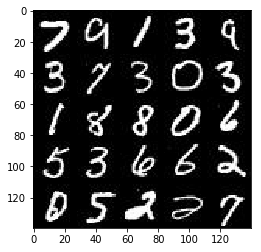

In [34]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

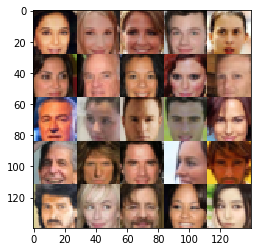

In [35]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [37]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    
    return real_input, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [55]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope("discriminator", reuse=reuse):
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        conv1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(conv1, 128, 5, strides=2, padding='same')
        conv2 = tf.layers.batch_normalization(conv2,  training=True)
        conv2 = tf.maximum(alpha * conv2, conv2)
        
        conv3 = tf.layers.conv2d(conv2, 256, 5, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3,  training=True)
        conv3 = tf.maximum(alpha * conv3, conv3)

        flat  = tf.reshape(conv3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [56]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*512)
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        # 7x7x512
        
        conv1 = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding="same")
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x256
        
        #conv2 = tf.layers.conv2d_transpose(conv1, 128, 5, strides=2, padding="same")
        #conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        #conv2 = tf.maximum(alpha * conv2, conv2)
        # 28x28x128
        
        logits = tf.layers.conv2d_transpose(conv1, out_channel_dim, 5, strides=2, padding="same")
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [57]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_real)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [58]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [59]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [60]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 1.0589... Generator Loss: 0.6826
Epoch 0/2... Discriminator Loss: 1.4324... Generator Loss: 0.5250
Epoch 0/2... Discriminator Loss: 0.6036... Generator Loss: 1.6398
Epoch 0/2... Discriminator Loss: 0.7227... Generator Loss: 3.3055


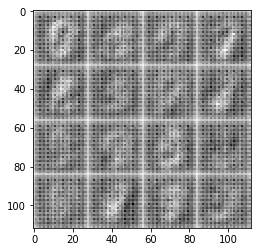

Epoch 0/2... Discriminator Loss: 1.3980... Generator Loss: 0.6734
Epoch 0/2... Discriminator Loss: 1.0602... Generator Loss: 0.7895
Epoch 0/2... Discriminator Loss: 1.0480... Generator Loss: 0.8640
Epoch 0/2... Discriminator Loss: 1.0985... Generator Loss: 1.0538
Epoch 0/2... Discriminator Loss: 1.1604... Generator Loss: 1.7813


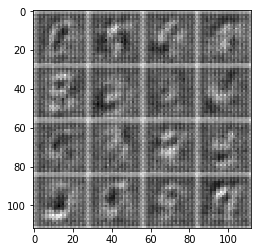

Epoch 0/2... Discriminator Loss: 1.0119... Generator Loss: 1.2285
Epoch 0/2... Discriminator Loss: 1.3043... Generator Loss: 0.4625
Epoch 0/2... Discriminator Loss: 1.4651... Generator Loss: 0.3368
Epoch 0/2... Discriminator Loss: 1.2244... Generator Loss: 0.4637
Epoch 0/2... Discriminator Loss: 1.1849... Generator Loss: 1.7776


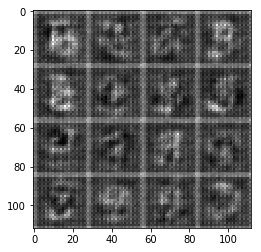

Epoch 0/2... Discriminator Loss: 1.0633... Generator Loss: 1.8847
Epoch 0/2... Discriminator Loss: 1.1906... Generator Loss: 0.5015
Epoch 0/2... Discriminator Loss: 0.8171... Generator Loss: 0.9361
Epoch 0/2... Discriminator Loss: 0.9260... Generator Loss: 0.9428
Epoch 0/2... Discriminator Loss: 0.7997... Generator Loss: 1.8198


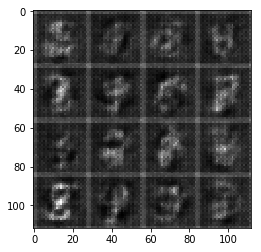

Epoch 0/2... Discriminator Loss: 0.9098... Generator Loss: 0.8670
Epoch 0/2... Discriminator Loss: 0.6974... Generator Loss: 1.2338
Epoch 0/2... Discriminator Loss: 0.8368... Generator Loss: 0.8590
Epoch 0/2... Discriminator Loss: 0.7443... Generator Loss: 1.1216
Epoch 0/2... Discriminator Loss: 0.7786... Generator Loss: 0.9169


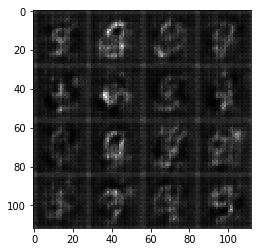

Epoch 0/2... Discriminator Loss: 1.0211... Generator Loss: 0.5750
Epoch 0/2... Discriminator Loss: 1.0634... Generator Loss: 0.6319
Epoch 0/2... Discriminator Loss: 1.0606... Generator Loss: 3.0864
Epoch 0/2... Discriminator Loss: 0.6638... Generator Loss: 1.0116
Epoch 0/2... Discriminator Loss: 0.8162... Generator Loss: 2.0331


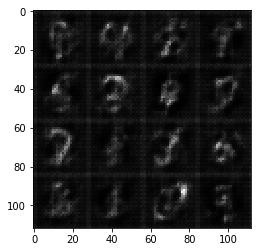

Epoch 0/2... Discriminator Loss: 0.6308... Generator Loss: 1.3198
Epoch 0/2... Discriminator Loss: 0.8648... Generator Loss: 0.8110
Epoch 0/2... Discriminator Loss: 0.7171... Generator Loss: 1.0190
Epoch 0/2... Discriminator Loss: 0.8326... Generator Loss: 0.8609
Epoch 0/2... Discriminator Loss: 0.6695... Generator Loss: 1.2077


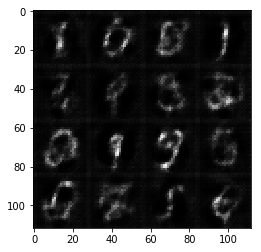

Epoch 0/2... Discriminator Loss: 0.6531... Generator Loss: 1.4530
Epoch 0/2... Discriminator Loss: 0.8674... Generator Loss: 0.7155
Epoch 0/2... Discriminator Loss: 0.6378... Generator Loss: 1.3166
Epoch 0/2... Discriminator Loss: 0.7625... Generator Loss: 0.9920
Epoch 0/2... Discriminator Loss: 0.7201... Generator Loss: 1.6202


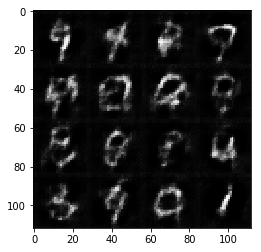

Epoch 0/2... Discriminator Loss: 1.4618... Generator Loss: 0.3586
Epoch 0/2... Discriminator Loss: 1.1306... Generator Loss: 2.9972
Epoch 0/2... Discriminator Loss: 1.3224... Generator Loss: 0.4187
Epoch 0/2... Discriminator Loss: 1.1566... Generator Loss: 0.6589
Epoch 0/2... Discriminator Loss: 0.7951... Generator Loss: 1.0602


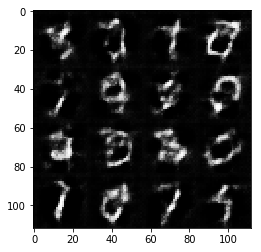

Epoch 0/2... Discriminator Loss: 0.6990... Generator Loss: 1.3989
Epoch 0/2... Discriminator Loss: 0.7910... Generator Loss: 2.3621
Epoch 0/2... Discriminator Loss: 1.4048... Generator Loss: 0.3631
Epoch 0/2... Discriminator Loss: 0.8370... Generator Loss: 2.2497
Epoch 0/2... Discriminator Loss: 0.6912... Generator Loss: 1.4273


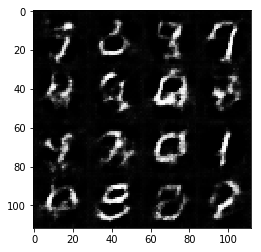

Epoch 0/2... Discriminator Loss: 0.7445... Generator Loss: 1.1098
Epoch 0/2... Discriminator Loss: 0.6523... Generator Loss: 1.4378
Epoch 0/2... Discriminator Loss: 0.9305... Generator Loss: 0.8125
Epoch 0/2... Discriminator Loss: 1.1633... Generator Loss: 0.5072
Epoch 0/2... Discriminator Loss: 0.6180... Generator Loss: 1.4182


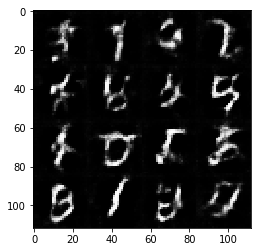

Epoch 0/2... Discriminator Loss: 0.6769... Generator Loss: 1.5416
Epoch 0/2... Discriminator Loss: 0.6720... Generator Loss: 2.3427
Epoch 0/2... Discriminator Loss: 0.9799... Generator Loss: 0.6946
Epoch 0/2... Discriminator Loss: 1.0471... Generator Loss: 0.6243
Epoch 0/2... Discriminator Loss: 0.9589... Generator Loss: 2.0420


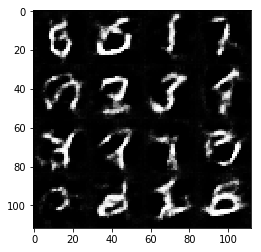

Epoch 0/2... Discriminator Loss: 0.9723... Generator Loss: 0.7390
Epoch 0/2... Discriminator Loss: 0.6167... Generator Loss: 1.3053
Epoch 0/2... Discriminator Loss: 0.9657... Generator Loss: 0.6820
Epoch 0/2... Discriminator Loss: 0.8274... Generator Loss: 0.8943
Epoch 0/2... Discriminator Loss: 0.8014... Generator Loss: 1.0509


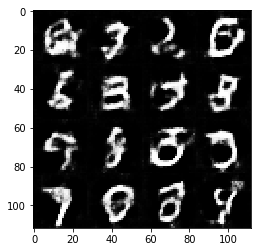

Epoch 0/2... Discriminator Loss: 0.9247... Generator Loss: 0.9363
Epoch 0/2... Discriminator Loss: 1.1558... Generator Loss: 0.5049
Epoch 0/2... Discriminator Loss: 0.9337... Generator Loss: 0.7361
Epoch 0/2... Discriminator Loss: 0.9115... Generator Loss: 0.9597
Epoch 0/2... Discriminator Loss: 1.0493... Generator Loss: 1.6806


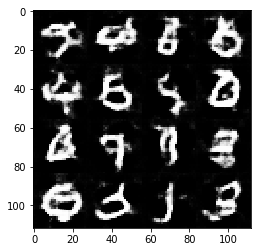

Epoch 0/2... Discriminator Loss: 0.9928... Generator Loss: 2.6639
Epoch 0/2... Discriminator Loss: 1.0398... Generator Loss: 0.6148
Epoch 0/2... Discriminator Loss: 1.3442... Generator Loss: 0.4053
Epoch 0/2... Discriminator Loss: 0.5710... Generator Loss: 1.9324
Epoch 0/2... Discriminator Loss: 0.7678... Generator Loss: 0.9213


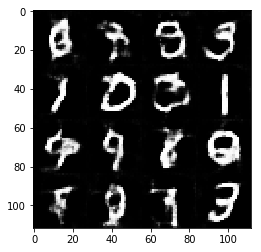

Epoch 0/2... Discriminator Loss: 0.8731... Generator Loss: 0.8260
Epoch 0/2... Discriminator Loss: 0.8148... Generator Loss: 0.9252
Epoch 0/2... Discriminator Loss: 0.7450... Generator Loss: 1.4927
Epoch 0/2... Discriminator Loss: 0.8888... Generator Loss: 0.8417
Epoch 0/2... Discriminator Loss: 0.7956... Generator Loss: 1.0812


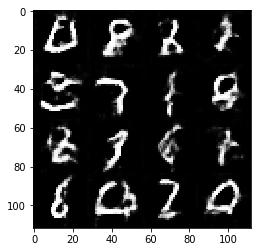

Epoch 0/2... Discriminator Loss: 0.7368... Generator Loss: 1.0117
Epoch 0/2... Discriminator Loss: 0.6279... Generator Loss: 1.1279
Epoch 0/2... Discriminator Loss: 0.8751... Generator Loss: 0.8190
Epoch 0/2... Discriminator Loss: 1.0424... Generator Loss: 0.6554
Epoch 0/2... Discriminator Loss: 0.9994... Generator Loss: 0.6862


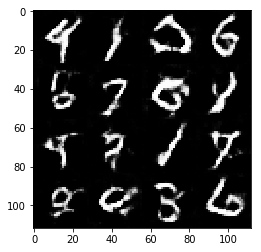

Epoch 0/2... Discriminator Loss: 0.7902... Generator Loss: 0.9303
Epoch 0/2... Discriminator Loss: 1.1514... Generator Loss: 0.4547
Epoch 0/2... Discriminator Loss: 0.6438... Generator Loss: 1.7768
Epoch 0/2... Discriminator Loss: 0.6946... Generator Loss: 1.1496
Epoch 0/2... Discriminator Loss: 0.8993... Generator Loss: 1.0270


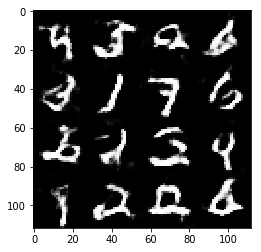

Epoch 0/2... Discriminator Loss: 0.5870... Generator Loss: 1.3048
Epoch 0/2... Discriminator Loss: 0.7423... Generator Loss: 0.9700
Epoch 0/2... Discriminator Loss: 0.6897... Generator Loss: 1.0100
Epoch 0/2... Discriminator Loss: 1.3759... Generator Loss: 0.3766
Epoch 0/2... Discriminator Loss: 0.7144... Generator Loss: 0.8905


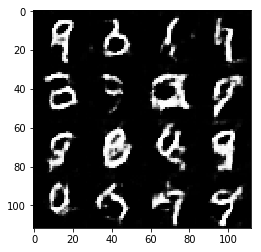

Epoch 0/2... Discriminator Loss: 0.7496... Generator Loss: 1.0521
Epoch 0/2... Discriminator Loss: 0.8297... Generator Loss: 0.8651
Epoch 0/2... Discriminator Loss: 0.6451... Generator Loss: 1.8335
Epoch 0/2... Discriminator Loss: 1.3174... Generator Loss: 0.4449
Epoch 0/2... Discriminator Loss: 1.3782... Generator Loss: 0.3695


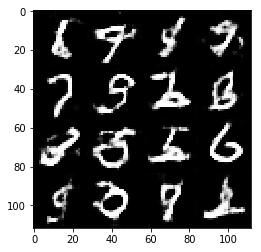

Epoch 0/2... Discriminator Loss: 1.0970... Generator Loss: 0.5848
Epoch 0/2... Discriminator Loss: 0.6231... Generator Loss: 1.1453
Epoch 0/2... Discriminator Loss: 0.7699... Generator Loss: 0.9558
Epoch 0/2... Discriminator Loss: 0.6440... Generator Loss: 1.0633
Epoch 0/2... Discriminator Loss: 2.9755... Generator Loss: 0.1040


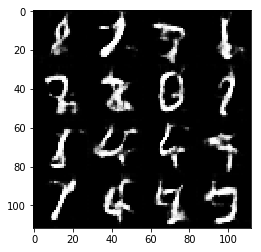

Epoch 0/2... Discriminator Loss: 1.2375... Generator Loss: 0.6816
Epoch 0/2... Discriminator Loss: 0.7383... Generator Loss: 1.1005
Epoch 0/2... Discriminator Loss: 0.8415... Generator Loss: 0.7538
Epoch 0/2... Discriminator Loss: 0.8065... Generator Loss: 0.8146
Epoch 0/2... Discriminator Loss: 1.0702... Generator Loss: 0.6472


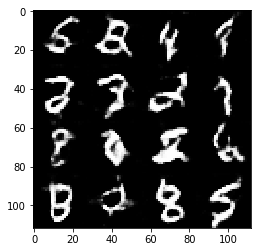

Epoch 0/2... Discriminator Loss: 0.9546... Generator Loss: 0.9218
Epoch 0/2... Discriminator Loss: 0.6877... Generator Loss: 1.1043
Epoch 0/2... Discriminator Loss: 0.6454... Generator Loss: 2.1245
Epoch 0/2... Discriminator Loss: 0.8904... Generator Loss: 0.7285
Epoch 0/2... Discriminator Loss: 0.6991... Generator Loss: 1.0675


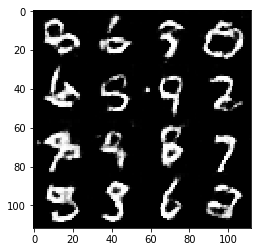

Epoch 0/2... Discriminator Loss: 0.7369... Generator Loss: 0.9650
Epoch 0/2... Discriminator Loss: 0.7681... Generator Loss: 0.8276
Epoch 0/2... Discriminator Loss: 0.6378... Generator Loss: 1.1653
Epoch 0/2... Discriminator Loss: 1.0373... Generator Loss: 0.6264
Epoch 0/2... Discriminator Loss: 0.6334... Generator Loss: 1.0169


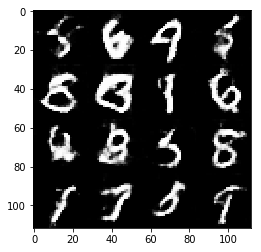

Epoch 0/2... Discriminator Loss: 0.7938... Generator Loss: 0.8991
Epoch 0/2... Discriminator Loss: 0.7890... Generator Loss: 0.8115
Epoch 0/2... Discriminator Loss: 0.9876... Generator Loss: 0.6208
Epoch 0/2... Discriminator Loss: 0.7078... Generator Loss: 1.0260
Epoch 0/2... Discriminator Loss: 0.7957... Generator Loss: 0.9088


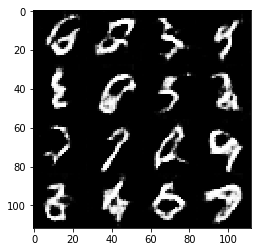

Epoch 0/2... Discriminator Loss: 0.6103... Generator Loss: 1.2166
Epoch 0/2... Discriminator Loss: 0.7585... Generator Loss: 1.0019
Epoch 0/2... Discriminator Loss: 0.5728... Generator Loss: 1.1524
Epoch 0/2... Discriminator Loss: 0.4736... Generator Loss: 1.5766
Epoch 0/2... Discriminator Loss: 1.3078... Generator Loss: 0.6119


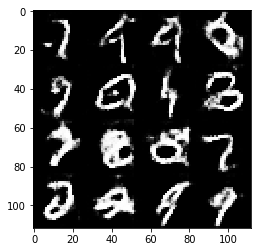

Epoch 0/2... Discriminator Loss: 1.0064... Generator Loss: 0.6272
Epoch 0/2... Discriminator Loss: 1.1176... Generator Loss: 0.5429
Epoch 0/2... Discriminator Loss: 0.8135... Generator Loss: 0.8205
Epoch 0/2... Discriminator Loss: 1.0016... Generator Loss: 0.6191
Epoch 0/2... Discriminator Loss: 0.8896... Generator Loss: 0.7254


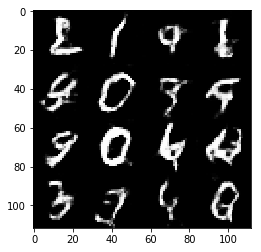

Epoch 0/2... Discriminator Loss: 0.6278... Generator Loss: 1.3007
Epoch 0/2... Discriminator Loss: 1.8207... Generator Loss: 0.2455
Epoch 0/2... Discriminator Loss: 0.8016... Generator Loss: 0.8237
Epoch 0/2... Discriminator Loss: 0.6433... Generator Loss: 1.0897
Epoch 0/2... Discriminator Loss: 0.9089... Generator Loss: 0.7508


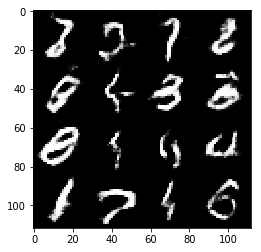

Epoch 0/2... Discriminator Loss: 0.6293... Generator Loss: 1.1312
Epoch 0/2... Discriminator Loss: 0.9638... Generator Loss: 0.6281
Epoch 0/2... Discriminator Loss: 0.4922... Generator Loss: 1.2121
Epoch 0/2... Discriminator Loss: 1.2021... Generator Loss: 0.5465
Epoch 0/2... Discriminator Loss: 1.9720... Generator Loss: 3.1360


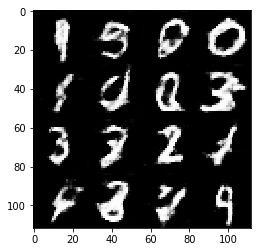

Epoch 0/2... Discriminator Loss: 0.6533... Generator Loss: 1.0701
Epoch 0/2... Discriminator Loss: 0.7288... Generator Loss: 1.0377
Epoch 0/2... Discriminator Loss: 0.6790... Generator Loss: 1.0167
Epoch 0/2... Discriminator Loss: 1.3114... Generator Loss: 0.4529
Epoch 0/2... Discriminator Loss: 1.0667... Generator Loss: 0.6215


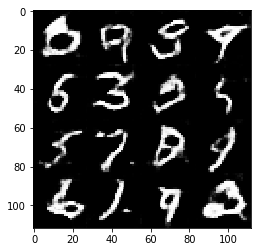

Epoch 0/2... Discriminator Loss: 0.7752... Generator Loss: 1.0490
Epoch 0/2... Discriminator Loss: 0.8593... Generator Loss: 0.7711
Epoch 0/2... Discriminator Loss: 0.4891... Generator Loss: 1.2874
Epoch 0/2... Discriminator Loss: 0.6914... Generator Loss: 1.0223
Epoch 0/2... Discriminator Loss: 1.1959... Generator Loss: 0.4865


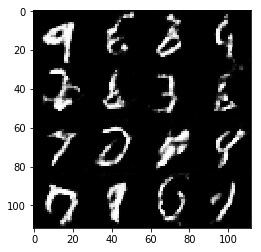

Epoch 0/2... Discriminator Loss: 0.8735... Generator Loss: 0.7863
Epoch 0/2... Discriminator Loss: 0.5921... Generator Loss: 1.0117
Epoch 0/2... Discriminator Loss: 0.4615... Generator Loss: 1.4082
Epoch 0/2... Discriminator Loss: 1.2885... Generator Loss: 0.5416
Epoch 0/2... Discriminator Loss: 0.9283... Generator Loss: 0.7582


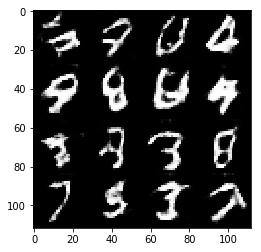

Epoch 0/2... Discriminator Loss: 0.8729... Generator Loss: 0.7382
Epoch 0/2... Discriminator Loss: 0.8923... Generator Loss: 1.6544
Epoch 0/2... Discriminator Loss: 0.5832... Generator Loss: 1.3040
Epoch 0/2... Discriminator Loss: 0.8917... Generator Loss: 0.8698
Epoch 0/2... Discriminator Loss: 0.7601... Generator Loss: 1.0053


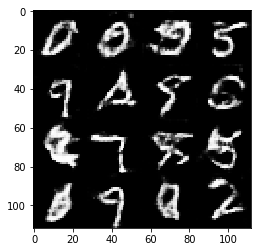

Epoch 0/2... Discriminator Loss: 0.8267... Generator Loss: 0.9934
Epoch 0/2... Discriminator Loss: 0.6233... Generator Loss: 1.1653
Epoch 0/2... Discriminator Loss: 0.8637... Generator Loss: 0.8119
Epoch 0/2... Discriminator Loss: 0.6974... Generator Loss: 0.9527
Epoch 0/2... Discriminator Loss: 0.6368... Generator Loss: 1.0299


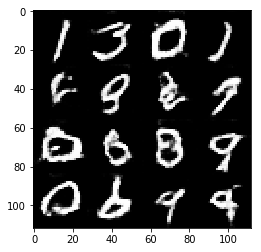

Epoch 0/2... Discriminator Loss: 0.7532... Generator Loss: 0.8366
Epoch 0/2... Discriminator Loss: 0.5278... Generator Loss: 1.2039
Epoch 0/2... Discriminator Loss: 0.8253... Generator Loss: 0.8234
Epoch 0/2... Discriminator Loss: 0.5141... Generator Loss: 1.2783
Epoch 0/2... Discriminator Loss: 0.4466... Generator Loss: 1.4341


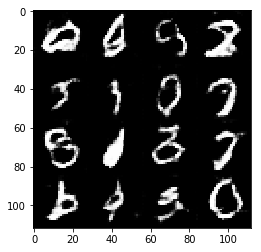

Epoch 0/2... Discriminator Loss: 0.7118... Generator Loss: 0.8892
Epoch 0/2... Discriminator Loss: 1.8435... Generator Loss: 0.2511
Epoch 0/2... Discriminator Loss: 0.7256... Generator Loss: 0.9084
Epoch 0/2... Discriminator Loss: 0.7849... Generator Loss: 0.8493
Epoch 0/2... Discriminator Loss: 0.4674... Generator Loss: 1.4113


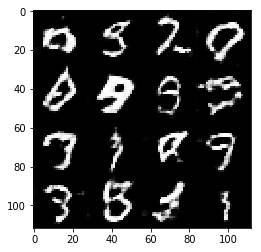

Epoch 0/2... Discriminator Loss: 1.2508... Generator Loss: 0.4752
Epoch 0/2... Discriminator Loss: 0.5734... Generator Loss: 1.1254
Epoch 0/2... Discriminator Loss: 0.4755... Generator Loss: 1.5018
Epoch 0/2... Discriminator Loss: 1.0773... Generator Loss: 0.7372
Epoch 0/2... Discriminator Loss: 0.2992... Generator Loss: 1.7342


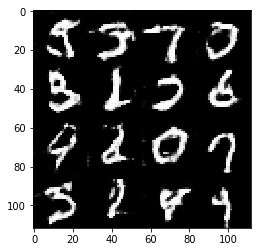

Epoch 0/2... Discriminator Loss: 0.6577... Generator Loss: 1.1067
Epoch 0/2... Discriminator Loss: 1.2561... Generator Loss: 0.5060
Epoch 0/2... Discriminator Loss: 1.1784... Generator Loss: 0.5530
Epoch 1/2... Discriminator Loss: 0.4691... Generator Loss: 1.4921
Epoch 1/2... Discriminator Loss: 0.5235... Generator Loss: 1.4397


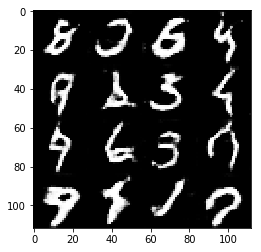

Epoch 1/2... Discriminator Loss: 0.3053... Generator Loss: 1.8053
Epoch 1/2... Discriminator Loss: 0.8148... Generator Loss: 0.9663
Epoch 1/2... Discriminator Loss: 0.7380... Generator Loss: 0.9317
Epoch 1/2... Discriminator Loss: 0.4728... Generator Loss: 1.6724
Epoch 1/2... Discriminator Loss: 0.5027... Generator Loss: 1.2290


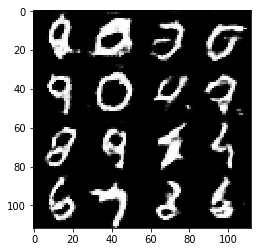

Epoch 1/2... Discriminator Loss: 1.0080... Generator Loss: 0.6878
Epoch 1/2... Discriminator Loss: 0.4562... Generator Loss: 1.3703
Epoch 1/2... Discriminator Loss: 1.5563... Generator Loss: 3.9270
Epoch 1/2... Discriminator Loss: 0.6608... Generator Loss: 1.1208
Epoch 1/2... Discriminator Loss: 0.6399... Generator Loss: 1.0277


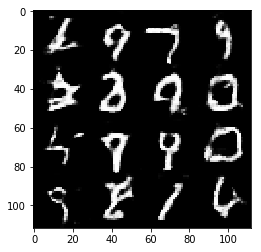

Epoch 1/2... Discriminator Loss: 0.9617... Generator Loss: 0.7216
Epoch 1/2... Discriminator Loss: 0.5902... Generator Loss: 1.1511
Epoch 1/2... Discriminator Loss: 0.2273... Generator Loss: 2.6387
Epoch 1/2... Discriminator Loss: 0.3381... Generator Loss: 1.8125
Epoch 1/2... Discriminator Loss: 0.5150... Generator Loss: 1.1729


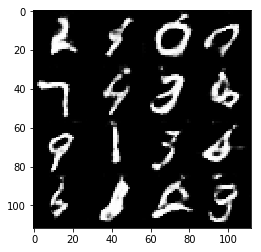

Epoch 1/2... Discriminator Loss: 3.6935... Generator Loss: 0.0577
Epoch 1/2... Discriminator Loss: 0.6743... Generator Loss: 1.7760
Epoch 1/2... Discriminator Loss: 1.2239... Generator Loss: 0.5040
Epoch 1/2... Discriminator Loss: 0.8802... Generator Loss: 0.7447
Epoch 1/2... Discriminator Loss: 1.0278... Generator Loss: 0.6688


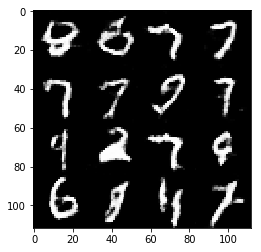

Epoch 1/2... Discriminator Loss: 1.3374... Generator Loss: 0.4630
Epoch 1/2... Discriminator Loss: 0.5297... Generator Loss: 1.3110
Epoch 1/2... Discriminator Loss: 1.0740... Generator Loss: 0.5879
Epoch 1/2... Discriminator Loss: 1.0357... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 1.2116... Generator Loss: 0.4978


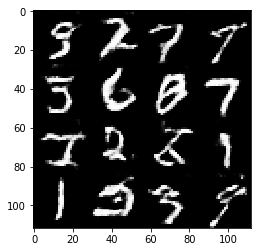

Epoch 1/2... Discriminator Loss: 0.6521... Generator Loss: 1.2189
Epoch 1/2... Discriminator Loss: 0.9052... Generator Loss: 0.8337
Epoch 1/2... Discriminator Loss: 0.9536... Generator Loss: 0.6844
Epoch 1/2... Discriminator Loss: 1.5107... Generator Loss: 0.4212
Epoch 1/2... Discriminator Loss: 0.4854... Generator Loss: 1.5166


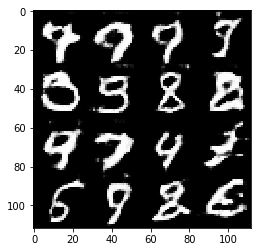

Epoch 1/2... Discriminator Loss: 1.0614... Generator Loss: 0.7690
Epoch 1/2... Discriminator Loss: 0.7278... Generator Loss: 0.9622
Epoch 1/2... Discriminator Loss: 0.7417... Generator Loss: 0.9061
Epoch 1/2... Discriminator Loss: 0.7460... Generator Loss: 0.8905
Epoch 1/2... Discriminator Loss: 0.3522... Generator Loss: 1.7090


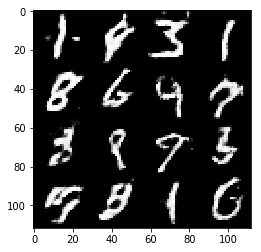

Epoch 1/2... Discriminator Loss: 0.7386... Generator Loss: 0.8828
Epoch 1/2... Discriminator Loss: 0.4819... Generator Loss: 1.3774
Epoch 1/2... Discriminator Loss: 0.6592... Generator Loss: 1.0915
Epoch 1/2... Discriminator Loss: 0.5395... Generator Loss: 1.1447
Epoch 1/2... Discriminator Loss: 0.4031... Generator Loss: 1.5333


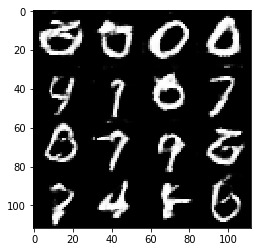

Epoch 1/2... Discriminator Loss: 0.8882... Generator Loss: 0.7056
Epoch 1/2... Discriminator Loss: 2.0654... Generator Loss: 0.2309
Epoch 1/2... Discriminator Loss: 0.4616... Generator Loss: 1.4321
Epoch 1/2... Discriminator Loss: 1.0064... Generator Loss: 0.6077
Epoch 1/2... Discriminator Loss: 0.5228... Generator Loss: 1.2090


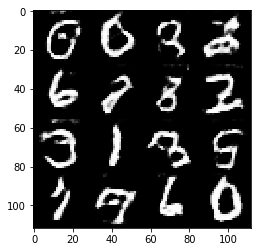

Epoch 1/2... Discriminator Loss: 1.8944... Generator Loss: 6.5912
Epoch 1/2... Discriminator Loss: 0.7420... Generator Loss: 1.2577
Epoch 1/2... Discriminator Loss: 0.6308... Generator Loss: 1.0912
Epoch 1/2... Discriminator Loss: 0.6774... Generator Loss: 0.9710
Epoch 1/2... Discriminator Loss: 0.5883... Generator Loss: 1.1030


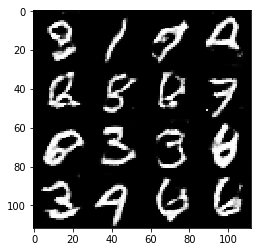

Epoch 1/2... Discriminator Loss: 0.4181... Generator Loss: 1.6054
Epoch 1/2... Discriminator Loss: 0.7126... Generator Loss: 0.9597
Epoch 1/2... Discriminator Loss: 0.5812... Generator Loss: 1.0777
Epoch 1/2... Discriminator Loss: 0.6368... Generator Loss: 1.0180
Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 0.6081


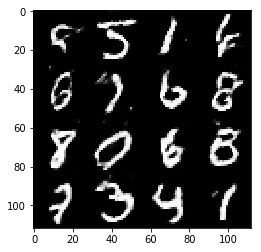

Epoch 1/2... Discriminator Loss: 0.5952... Generator Loss: 1.2006
Epoch 1/2... Discriminator Loss: 0.8858... Generator Loss: 0.8336
Epoch 1/2... Discriminator Loss: 0.7054... Generator Loss: 0.9664
Epoch 1/2... Discriminator Loss: 0.9051... Generator Loss: 0.7623
Epoch 1/2... Discriminator Loss: 0.2926... Generator Loss: 2.0019


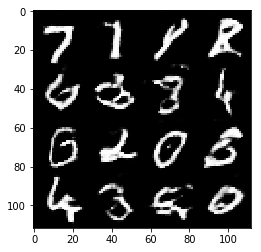

Epoch 1/2... Discriminator Loss: 0.9431... Generator Loss: 0.7905
Epoch 1/2... Discriminator Loss: 2.0478... Generator Loss: 0.1900
Epoch 1/2... Discriminator Loss: 0.6987... Generator Loss: 0.9411
Epoch 1/2... Discriminator Loss: 1.2712... Generator Loss: 0.6779
Epoch 1/2... Discriminator Loss: 0.3187... Generator Loss: 1.8947


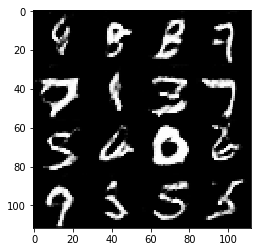

Epoch 1/2... Discriminator Loss: 0.5282... Generator Loss: 1.2029
Epoch 1/2... Discriminator Loss: 0.3832... Generator Loss: 1.8522
Epoch 1/2... Discriminator Loss: 0.9439... Generator Loss: 4.1818
Epoch 1/2... Discriminator Loss: 0.3601... Generator Loss: 1.7960
Epoch 1/2... Discriminator Loss: 0.8013... Generator Loss: 0.8374


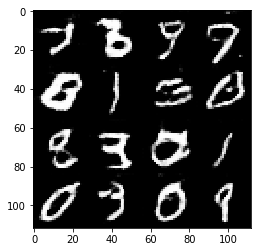

Epoch 1/2... Discriminator Loss: 0.6895... Generator Loss: 1.0019
Epoch 1/2... Discriminator Loss: 0.4662... Generator Loss: 1.4133
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 0.7649... Generator Loss: 0.9237
Epoch 1/2... Discriminator Loss: 0.2485... Generator Loss: 2.2934


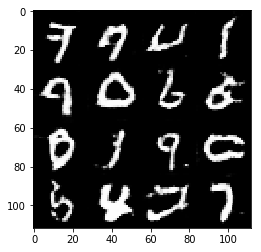

Epoch 1/2... Discriminator Loss: 0.7537... Generator Loss: 1.0557
Epoch 1/2... Discriminator Loss: 0.4874... Generator Loss: 1.7363
Epoch 1/2... Discriminator Loss: 0.5946... Generator Loss: 1.1640
Epoch 1/2... Discriminator Loss: 0.3822... Generator Loss: 1.6793
Epoch 1/2... Discriminator Loss: 0.6047... Generator Loss: 1.2200


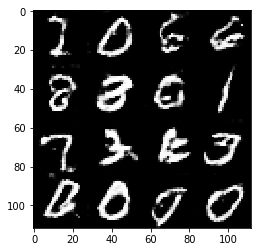

Epoch 1/2... Discriminator Loss: 0.6313... Generator Loss: 1.1106
Epoch 1/2... Discriminator Loss: 0.5205... Generator Loss: 1.3452
Epoch 1/2... Discriminator Loss: 0.8116... Generator Loss: 0.7916
Epoch 1/2... Discriminator Loss: 0.9863... Generator Loss: 0.8195
Epoch 1/2... Discriminator Loss: 0.8915... Generator Loss: 0.7374


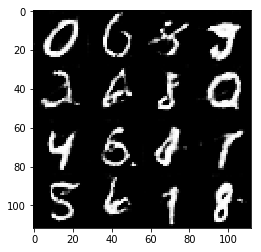

Epoch 1/2... Discriminator Loss: 0.9294... Generator Loss: 0.7737
Epoch 1/2... Discriminator Loss: 0.9096... Generator Loss: 0.9621
Epoch 1/2... Discriminator Loss: 0.8840... Generator Loss: 0.8594
Epoch 1/2... Discriminator Loss: 0.7242... Generator Loss: 0.9328
Epoch 1/2... Discriminator Loss: 0.3321... Generator Loss: 1.9156


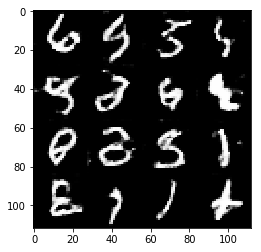

Epoch 1/2... Discriminator Loss: 0.4451... Generator Loss: 1.2982
Epoch 1/2... Discriminator Loss: 0.4735... Generator Loss: 1.3188
Epoch 1/2... Discriminator Loss: 0.4237... Generator Loss: 1.3001
Epoch 1/2... Discriminator Loss: 0.3651... Generator Loss: 1.5735
Epoch 1/2... Discriminator Loss: 0.6680... Generator Loss: 1.0119


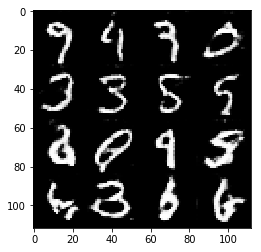

Epoch 1/2... Discriminator Loss: 0.4393... Generator Loss: 1.4978
Epoch 1/2... Discriminator Loss: 1.5401... Generator Loss: 0.4239
Epoch 1/2... Discriminator Loss: 1.1278... Generator Loss: 0.5514
Epoch 1/2... Discriminator Loss: 0.5976... Generator Loss: 0.9559
Epoch 1/2... Discriminator Loss: 0.8228... Generator Loss: 1.0472


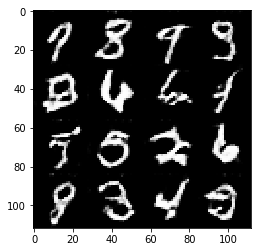

Epoch 1/2... Discriminator Loss: 0.9380... Generator Loss: 0.7483
Epoch 1/2... Discriminator Loss: 4.8002... Generator Loss: 10.1983
Epoch 1/2... Discriminator Loss: 0.3969... Generator Loss: 1.7967
Epoch 1/2... Discriminator Loss: 0.4744... Generator Loss: 1.7406
Epoch 1/2... Discriminator Loss: 0.5561... Generator Loss: 1.1862


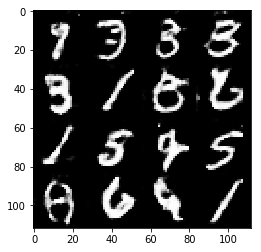

Epoch 1/2... Discriminator Loss: 0.6481... Generator Loss: 1.0425
Epoch 1/2... Discriminator Loss: 0.4446... Generator Loss: 1.9141
Epoch 1/2... Discriminator Loss: 0.2901... Generator Loss: 1.9783
Epoch 1/2... Discriminator Loss: 0.4417... Generator Loss: 1.3773
Epoch 1/2... Discriminator Loss: 0.6467... Generator Loss: 1.0921


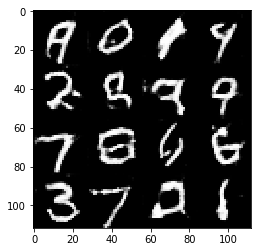

Epoch 1/2... Discriminator Loss: 0.6395... Generator Loss: 1.0821
Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 1.8657
Epoch 1/2... Discriminator Loss: 0.5383... Generator Loss: 1.3198
Epoch 1/2... Discriminator Loss: 1.9071... Generator Loss: 0.2764
Epoch 1/2... Discriminator Loss: 0.6552... Generator Loss: 1.3687


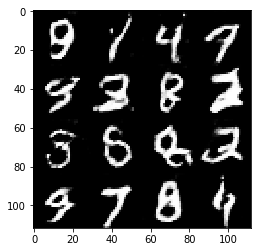

Epoch 1/2... Discriminator Loss: 0.6593... Generator Loss: 1.0407
Epoch 1/2... Discriminator Loss: 0.8779... Generator Loss: 0.7791
Epoch 1/2... Discriminator Loss: 0.6426... Generator Loss: 1.3040
Epoch 1/2... Discriminator Loss: 0.4782... Generator Loss: 1.3796
Epoch 1/2... Discriminator Loss: 0.8592... Generator Loss: 0.7795


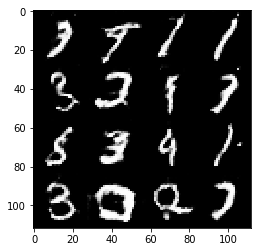

Epoch 1/2... Discriminator Loss: 0.6056... Generator Loss: 1.1301
Epoch 1/2... Discriminator Loss: 0.6605... Generator Loss: 1.0305
Epoch 1/2... Discriminator Loss: 0.8049... Generator Loss: 1.0355
Epoch 1/2... Discriminator Loss: 0.6566... Generator Loss: 1.0000
Epoch 1/2... Discriminator Loss: 0.1562... Generator Loss: 3.2545


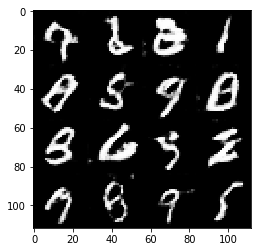

Epoch 1/2... Discriminator Loss: 0.9859... Generator Loss: 0.6478
Epoch 1/2... Discriminator Loss: 0.3606... Generator Loss: 1.6737
Epoch 1/2... Discriminator Loss: 0.6800... Generator Loss: 1.1646
Epoch 1/2... Discriminator Loss: 0.2853... Generator Loss: 1.7873
Epoch 1/2... Discriminator Loss: 0.4152... Generator Loss: 1.5326


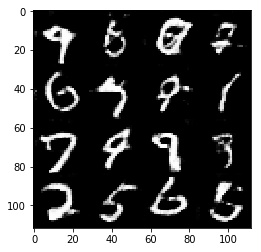

Epoch 1/2... Discriminator Loss: 0.5924... Generator Loss: 1.1661
Epoch 1/2... Discriminator Loss: 1.7419... Generator Loss: 0.2853
Epoch 1/2... Discriminator Loss: 1.0116... Generator Loss: 0.7225
Epoch 1/2... Discriminator Loss: 0.5540... Generator Loss: 1.2927
Epoch 1/2... Discriminator Loss: 0.9933... Generator Loss: 4.3262


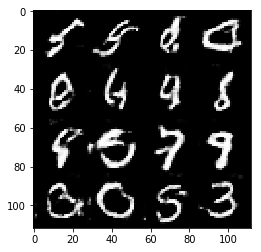

Epoch 1/2... Discriminator Loss: 1.2726... Generator Loss: 4.1919
Epoch 1/2... Discriminator Loss: 0.6672... Generator Loss: 2.4549
Epoch 1/2... Discriminator Loss: 0.3834... Generator Loss: 1.4686
Epoch 1/2... Discriminator Loss: 0.3891... Generator Loss: 1.3926
Epoch 1/2... Discriminator Loss: 0.3799... Generator Loss: 1.6768


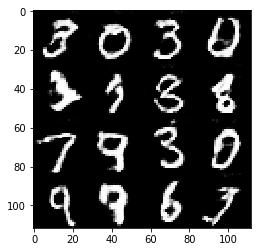

Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 1.0279
Epoch 1/2... Discriminator Loss: 0.3962... Generator Loss: 1.6771
Epoch 1/2... Discriminator Loss: 0.2068... Generator Loss: 2.8536
Epoch 1/2... Discriminator Loss: 0.3955... Generator Loss: 1.6250
Epoch 1/2... Discriminator Loss: 0.5900... Generator Loss: 1.5535


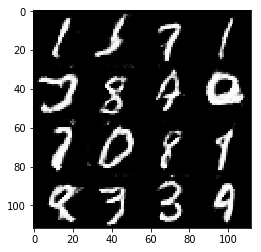

Epoch 1/2... Discriminator Loss: 0.5727... Generator Loss: 2.5386
Epoch 1/2... Discriminator Loss: 0.6663... Generator Loss: 1.2371
Epoch 1/2... Discriminator Loss: 0.4160... Generator Loss: 1.5042
Epoch 1/2... Discriminator Loss: 0.3823... Generator Loss: 1.6344
Epoch 1/2... Discriminator Loss: 0.6056... Generator Loss: 1.1512


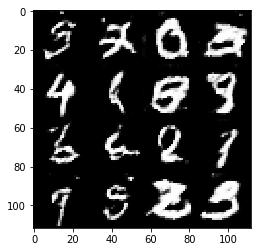

Epoch 1/2... Discriminator Loss: 0.4064... Generator Loss: 1.5596
Epoch 1/2... Discriminator Loss: 0.3606... Generator Loss: 1.6044
Epoch 1/2... Discriminator Loss: 0.5240... Generator Loss: 1.1966
Epoch 1/2... Discriminator Loss: 0.3042... Generator Loss: 2.0234
Epoch 1/2... Discriminator Loss: 0.5723... Generator Loss: 1.2564


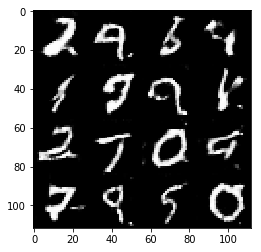

Epoch 1/2... Discriminator Loss: 1.2950... Generator Loss: 0.4473
Epoch 1/2... Discriminator Loss: 0.5211... Generator Loss: 1.4543
Epoch 1/2... Discriminator Loss: 0.3627... Generator Loss: 1.6750
Epoch 1/2... Discriminator Loss: 0.7163... Generator Loss: 1.0854
Epoch 1/2... Discriminator Loss: 0.2315... Generator Loss: 2.2011


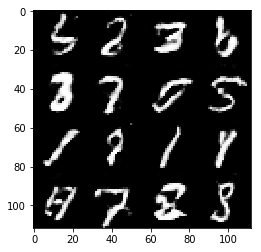

Epoch 1/2... Discriminator Loss: 0.7547... Generator Loss: 1.0386
Epoch 1/2... Discriminator Loss: 0.4158... Generator Loss: 1.7234
Epoch 1/2... Discriminator Loss: 0.3850... Generator Loss: 1.6187
Epoch 1/2... Discriminator Loss: 0.4138... Generator Loss: 1.7681
Epoch 1/2... Discriminator Loss: 0.3826... Generator Loss: 1.7854


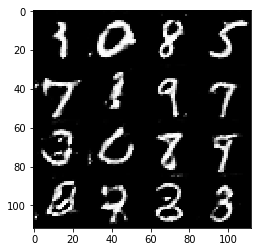

Epoch 1/2... Discriminator Loss: 0.3926... Generator Loss: 1.6258
Epoch 1/2... Discriminator Loss: 0.5243... Generator Loss: 1.2584
Epoch 1/2... Discriminator Loss: 0.6596... Generator Loss: 1.0647
Epoch 1/2... Discriminator Loss: 0.3745... Generator Loss: 1.8274
Epoch 1/2... Discriminator Loss: 0.4186... Generator Loss: 1.6795


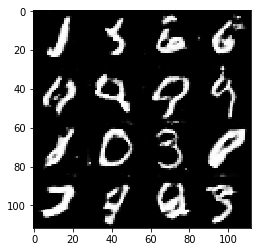

Epoch 1/2... Discriminator Loss: 0.3964... Generator Loss: 1.4649
Epoch 1/2... Discriminator Loss: 0.2873... Generator Loss: 1.8558
Epoch 1/2... Discriminator Loss: 0.2544... Generator Loss: 1.9936
Epoch 1/2... Discriminator Loss: 4.7786... Generator Loss: 9.5316
Epoch 1/2... Discriminator Loss: 1.5637... Generator Loss: 0.5040


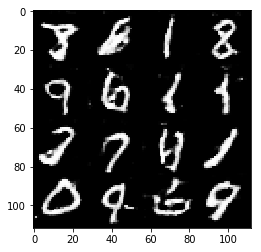

Epoch 1/2... Discriminator Loss: 0.9934... Generator Loss: 0.8481
Epoch 1/2... Discriminator Loss: 1.3439... Generator Loss: 0.5163
Epoch 1/2... Discriminator Loss: 0.4227... Generator Loss: 1.5648
Epoch 1/2... Discriminator Loss: 0.6030... Generator Loss: 1.2183
Epoch 1/2... Discriminator Loss: 0.3490... Generator Loss: 1.4462


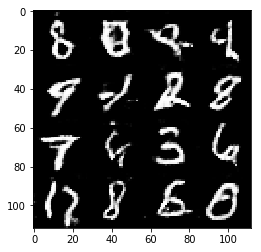

Epoch 1/2... Discriminator Loss: 0.1851... Generator Loss: 2.9378
Epoch 1/2... Discriminator Loss: 0.2807... Generator Loss: 1.8678
Epoch 1/2... Discriminator Loss: 0.5802... Generator Loss: 1.1581
Epoch 1/2... Discriminator Loss: 0.9141... Generator Loss: 0.7184
Epoch 1/2... Discriminator Loss: 0.6312... Generator Loss: 1.2313


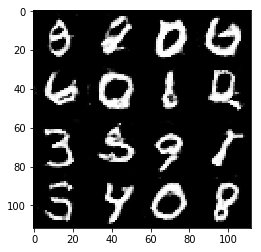

Epoch 1/2... Discriminator Loss: 0.4034... Generator Loss: 4.7508


In [61]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.0003... Generator Loss: 0.7667
Epoch 0/1... Discriminator Loss: 0.4079... Generator Loss: 1.6271
Epoch 0/1... Discriminator Loss: 1.1983... Generator Loss: 0.5056
Epoch 0/1... Discriminator Loss: 0.5492... Generator Loss: 1.5288


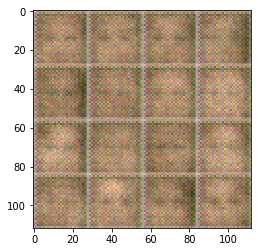

Epoch 0/1... Discriminator Loss: 2.3355... Generator Loss: 4.1008
Epoch 0/1... Discriminator Loss: 1.4643... Generator Loss: 0.4928
Epoch 0/1... Discriminator Loss: 1.8081... Generator Loss: 0.2789
Epoch 0/1... Discriminator Loss: 1.2267... Generator Loss: 0.5656
Epoch 0/1... Discriminator Loss: 1.5393... Generator Loss: 0.4304


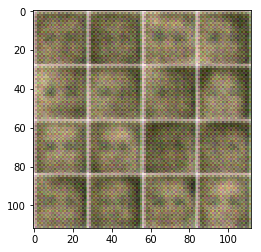

Epoch 0/1... Discriminator Loss: 1.9376... Generator Loss: 0.2196
Epoch 0/1... Discriminator Loss: 1.3345... Generator Loss: 0.6662
Epoch 0/1... Discriminator Loss: 1.3543... Generator Loss: 1.7555
Epoch 0/1... Discriminator Loss: 0.7868... Generator Loss: 2.0312
Epoch 0/1... Discriminator Loss: 1.2223... Generator Loss: 0.5711


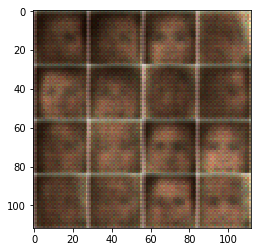

Epoch 0/1... Discriminator Loss: 1.0200... Generator Loss: 0.7696
Epoch 0/1... Discriminator Loss: 1.0636... Generator Loss: 0.5845
Epoch 0/1... Discriminator Loss: 1.1970... Generator Loss: 0.5749
Epoch 0/1... Discriminator Loss: 0.3784... Generator Loss: 3.2705
Epoch 0/1... Discriminator Loss: 1.2163... Generator Loss: 0.6024


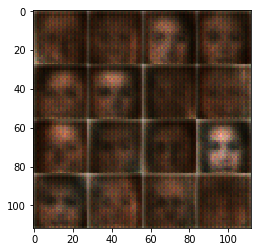

Epoch 0/1... Discriminator Loss: 0.4798... Generator Loss: 2.0070
Epoch 0/1... Discriminator Loss: 0.3954... Generator Loss: 2.0838
Epoch 0/1... Discriminator Loss: 1.2202... Generator Loss: 0.4800
Epoch 0/1... Discriminator Loss: 0.7727... Generator Loss: 1.4188
Epoch 0/1... Discriminator Loss: 0.8975... Generator Loss: 0.7460


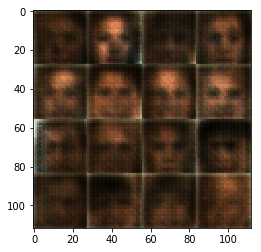

Epoch 0/1... Discriminator Loss: 0.4562... Generator Loss: 1.5924
Epoch 0/1... Discriminator Loss: 0.3351... Generator Loss: 2.0010
Epoch 0/1... Discriminator Loss: 1.8863... Generator Loss: 0.2151
Epoch 0/1... Discriminator Loss: 0.1947... Generator Loss: 2.7745
Epoch 0/1... Discriminator Loss: 0.8447... Generator Loss: 0.7112


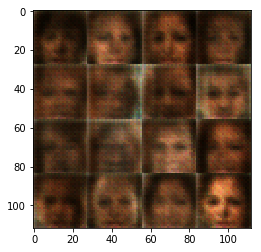

Epoch 0/1... Discriminator Loss: 0.6038... Generator Loss: 1.6162
Epoch 0/1... Discriminator Loss: 1.0665... Generator Loss: 0.5479
Epoch 0/1... Discriminator Loss: 0.6895... Generator Loss: 1.0921
Epoch 0/1... Discriminator Loss: 1.2306... Generator Loss: 0.4658
Epoch 0/1... Discriminator Loss: 0.4735... Generator Loss: 1.7964


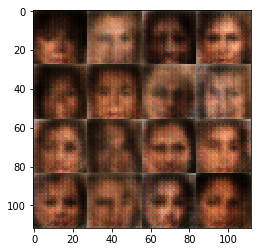

Epoch 0/1... Discriminator Loss: 0.8631... Generator Loss: 0.7037
Epoch 0/1... Discriminator Loss: 2.2120... Generator Loss: 0.1401
Epoch 0/1... Discriminator Loss: 1.0531... Generator Loss: 0.8268
Epoch 0/1... Discriminator Loss: 0.8175... Generator Loss: 3.4592
Epoch 0/1... Discriminator Loss: 0.2569... Generator Loss: 3.2598


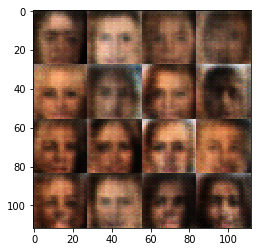

Epoch 0/1... Discriminator Loss: 0.9128... Generator Loss: 0.8579
Epoch 0/1... Discriminator Loss: 1.2215... Generator Loss: 0.6038
Epoch 0/1... Discriminator Loss: 0.6696... Generator Loss: 1.1018
Epoch 0/1... Discriminator Loss: 0.8364... Generator Loss: 0.9214
Epoch 0/1... Discriminator Loss: 2.0341... Generator Loss: 0.1875


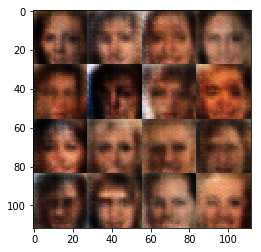

Epoch 0/1... Discriminator Loss: 0.9260... Generator Loss: 1.0810
Epoch 0/1... Discriminator Loss: 1.4607... Generator Loss: 0.3827
Epoch 0/1... Discriminator Loss: 0.5888... Generator Loss: 1.6570
Epoch 0/1... Discriminator Loss: 1.1000... Generator Loss: 0.7828
Epoch 0/1... Discriminator Loss: 0.6196... Generator Loss: 1.4628


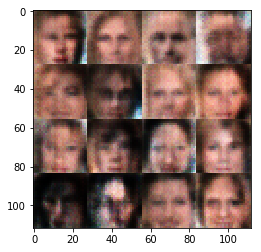

Epoch 0/1... Discriminator Loss: 0.5636... Generator Loss: 1.1434
Epoch 0/1... Discriminator Loss: 1.3459... Generator Loss: 0.4470
Epoch 0/1... Discriminator Loss: 1.1007... Generator Loss: 0.5730
Epoch 0/1... Discriminator Loss: 0.7404... Generator Loss: 4.2724
Epoch 0/1... Discriminator Loss: 3.1872... Generator Loss: 0.0568


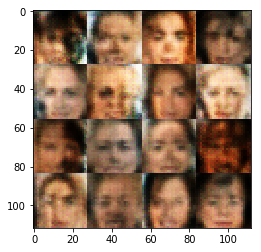

Epoch 0/1... Discriminator Loss: 1.1220... Generator Loss: 0.5148
Epoch 0/1... Discriminator Loss: 0.3292... Generator Loss: 3.2549
Epoch 0/1... Discriminator Loss: 0.4698... Generator Loss: 1.3583
Epoch 0/1... Discriminator Loss: 0.3367... Generator Loss: 4.2822
Epoch 0/1... Discriminator Loss: 0.4241... Generator Loss: 1.6942


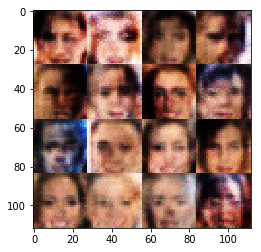

Epoch 0/1... Discriminator Loss: 0.1952... Generator Loss: 2.3796
Epoch 0/1... Discriminator Loss: 2.1316... Generator Loss: 4.0989
Epoch 0/1... Discriminator Loss: 0.8981... Generator Loss: 0.9790
Epoch 0/1... Discriminator Loss: 0.5294... Generator Loss: 2.0414
Epoch 0/1... Discriminator Loss: 0.5453... Generator Loss: 1.9785


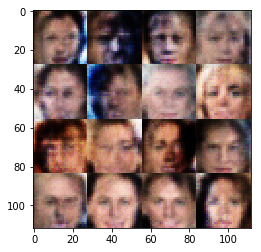

Epoch 0/1... Discriminator Loss: 0.5308... Generator Loss: 2.8929
Epoch 0/1... Discriminator Loss: 1.1412... Generator Loss: 0.5785
Epoch 0/1... Discriminator Loss: 0.8385... Generator Loss: 2.0887
Epoch 0/1... Discriminator Loss: 1.0386... Generator Loss: 1.5694
Epoch 0/1... Discriminator Loss: 1.0506... Generator Loss: 2.1070


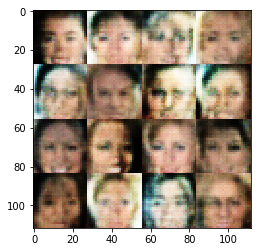

Epoch 0/1... Discriminator Loss: 0.9714... Generator Loss: 0.7573
Epoch 0/1... Discriminator Loss: 0.5187... Generator Loss: 2.2156
Epoch 0/1... Discriminator Loss: 1.4513... Generator Loss: 3.7545
Epoch 0/1... Discriminator Loss: 0.8433... Generator Loss: 0.8991
Epoch 0/1... Discriminator Loss: 0.5877... Generator Loss: 1.9540


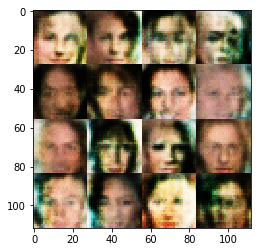

Epoch 0/1... Discriminator Loss: 0.3410... Generator Loss: 2.1869
Epoch 0/1... Discriminator Loss: 0.5391... Generator Loss: 6.4281
Epoch 0/1... Discriminator Loss: 1.3150... Generator Loss: 0.4011
Epoch 0/1... Discriminator Loss: 1.8503... Generator Loss: 0.2503
Epoch 0/1... Discriminator Loss: 0.5953... Generator Loss: 4.2154


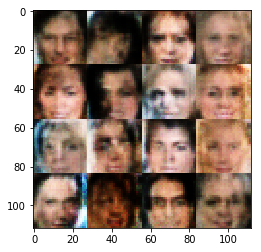

Epoch 0/1... Discriminator Loss: 0.5186... Generator Loss: 2.0540
Epoch 0/1... Discriminator Loss: 0.8194... Generator Loss: 3.6377
Epoch 0/1... Discriminator Loss: 0.3203... Generator Loss: 1.6024
Epoch 0/1... Discriminator Loss: 0.6838... Generator Loss: 0.9720
Epoch 0/1... Discriminator Loss: 1.3990... Generator Loss: 0.4218


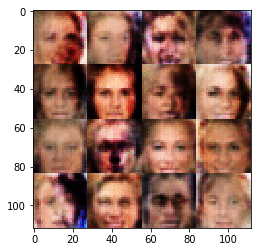

Epoch 0/1... Discriminator Loss: 1.2788... Generator Loss: 0.5182
Epoch 0/1... Discriminator Loss: 0.4692... Generator Loss: 1.7649
Epoch 0/1... Discriminator Loss: 0.6762... Generator Loss: 0.9254
Epoch 0/1... Discriminator Loss: 0.3784... Generator Loss: 2.2409
Epoch 0/1... Discriminator Loss: 0.7121... Generator Loss: 1.1747


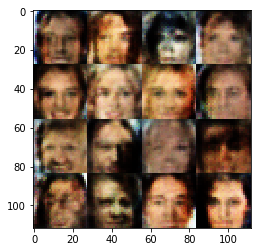

Epoch 0/1... Discriminator Loss: 0.6166... Generator Loss: 0.9531
Epoch 0/1... Discriminator Loss: 1.3397... Generator Loss: 1.0302
Epoch 0/1... Discriminator Loss: 2.1029... Generator Loss: 0.2168
Epoch 0/1... Discriminator Loss: 0.3041... Generator Loss: 2.3645
Epoch 0/1... Discriminator Loss: 1.1199... Generator Loss: 1.3013


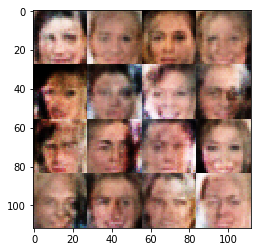

Epoch 0/1... Discriminator Loss: 0.8584... Generator Loss: 0.9607
Epoch 0/1... Discriminator Loss: 0.6352... Generator Loss: 1.0609
Epoch 0/1... Discriminator Loss: 0.6489... Generator Loss: 2.1546
Epoch 0/1... Discriminator Loss: 0.4835... Generator Loss: 1.5179
Epoch 0/1... Discriminator Loss: 1.0629... Generator Loss: 0.5332


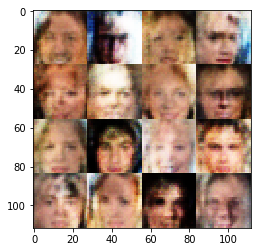

Epoch 0/1... Discriminator Loss: 0.8841... Generator Loss: 0.7171
Epoch 0/1... Discriminator Loss: 0.4410... Generator Loss: 1.5341
Epoch 0/1... Discriminator Loss: 1.0250... Generator Loss: 0.6568
Epoch 0/1... Discriminator Loss: 0.5573... Generator Loss: 2.2939
Epoch 0/1... Discriminator Loss: 0.7640... Generator Loss: 1.0542


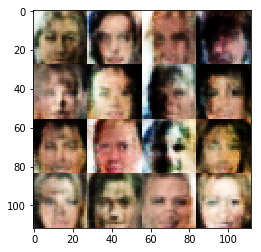

Epoch 0/1... Discriminator Loss: 1.5595... Generator Loss: 0.2996
Epoch 0/1... Discriminator Loss: 0.3199... Generator Loss: 1.8733
Epoch 0/1... Discriminator Loss: 1.6368... Generator Loss: 0.2761
Epoch 0/1... Discriminator Loss: 1.0547... Generator Loss: 1.2112
Epoch 0/1... Discriminator Loss: 0.3030... Generator Loss: 1.9895


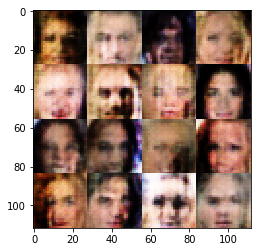

Epoch 0/1... Discriminator Loss: 0.6868... Generator Loss: 1.1920
Epoch 0/1... Discriminator Loss: 0.1514... Generator Loss: 3.4627
Epoch 0/1... Discriminator Loss: 0.4977... Generator Loss: 2.0700
Epoch 0/1... Discriminator Loss: 0.2696... Generator Loss: 2.5397
Epoch 0/1... Discriminator Loss: 1.4795... Generator Loss: 5.1136


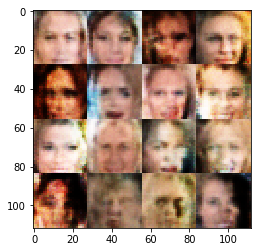

Epoch 0/1... Discriminator Loss: 0.3248... Generator Loss: 1.9502
Epoch 0/1... Discriminator Loss: 0.8273... Generator Loss: 0.9757
Epoch 0/1... Discriminator Loss: 0.9199... Generator Loss: 0.6713
Epoch 0/1... Discriminator Loss: 0.4418... Generator Loss: 1.9336
Epoch 0/1... Discriminator Loss: 0.4739... Generator Loss: 1.4040


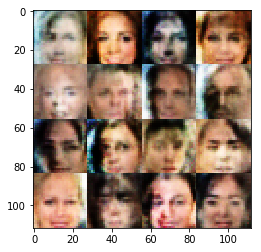

Epoch 0/1... Discriminator Loss: 0.9197... Generator Loss: 0.6851
Epoch 0/1... Discriminator Loss: 1.9173... Generator Loss: 0.2743
Epoch 0/1... Discriminator Loss: 1.1126... Generator Loss: 0.7251
Epoch 0/1... Discriminator Loss: 0.9691... Generator Loss: 1.2866
Epoch 0/1... Discriminator Loss: 1.3751... Generator Loss: 0.5008


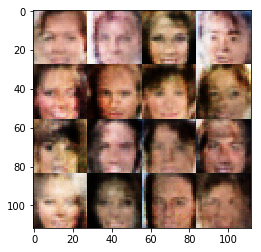

Epoch 0/1... Discriminator Loss: 0.8311... Generator Loss: 0.8820
Epoch 0/1... Discriminator Loss: 0.9586... Generator Loss: 1.3800
Epoch 0/1... Discriminator Loss: 1.3720... Generator Loss: 0.4512
Epoch 0/1... Discriminator Loss: 0.8865... Generator Loss: 1.6039
Epoch 0/1... Discriminator Loss: 1.5376... Generator Loss: 0.4652


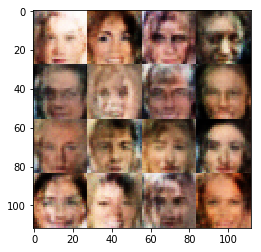

Epoch 0/1... Discriminator Loss: 1.0884... Generator Loss: 0.6856
Epoch 0/1... Discriminator Loss: 0.9411... Generator Loss: 1.1525
Epoch 0/1... Discriminator Loss: 1.0521... Generator Loss: 0.7344
Epoch 0/1... Discriminator Loss: 0.8367... Generator Loss: 1.1208
Epoch 0/1... Discriminator Loss: 1.5226... Generator Loss: 0.3476


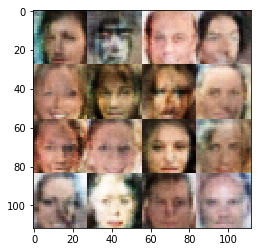

Epoch 0/1... Discriminator Loss: 0.7148... Generator Loss: 1.3814
Epoch 0/1... Discriminator Loss: 1.0642... Generator Loss: 0.9027
Epoch 0/1... Discriminator Loss: 0.6790... Generator Loss: 1.3392
Epoch 0/1... Discriminator Loss: 0.6159... Generator Loss: 1.9625
Epoch 0/1... Discriminator Loss: 0.9489... Generator Loss: 0.7699


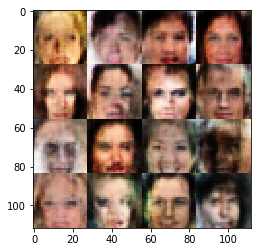

Epoch 0/1... Discriminator Loss: 1.1123... Generator Loss: 0.6949
Epoch 0/1... Discriminator Loss: 0.6126... Generator Loss: 1.1416
Epoch 0/1... Discriminator Loss: 0.3175... Generator Loss: 2.1136
Epoch 0/1... Discriminator Loss: 1.1896... Generator Loss: 0.4985
Epoch 0/1... Discriminator Loss: 0.7572... Generator Loss: 0.9444


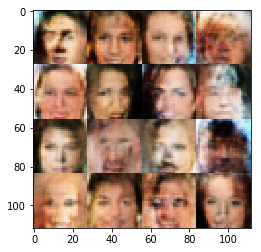

Epoch 0/1... Discriminator Loss: 2.4452... Generator Loss: 0.1400
Epoch 0/1... Discriminator Loss: 1.6079... Generator Loss: 0.2947
Epoch 0/1... Discriminator Loss: 0.8861... Generator Loss: 0.9231
Epoch 0/1... Discriminator Loss: 1.6520... Generator Loss: 0.2865
Epoch 0/1... Discriminator Loss: 0.3264... Generator Loss: 1.6856


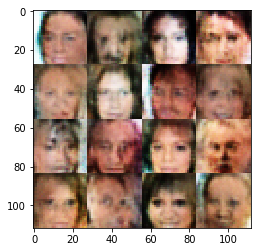

Epoch 0/1... Discriminator Loss: 0.9934... Generator Loss: 3.9511
Epoch 0/1... Discriminator Loss: 1.3673... Generator Loss: 0.4507
Epoch 0/1... Discriminator Loss: 2.1062... Generator Loss: 0.1841
Epoch 0/1... Discriminator Loss: 0.9334... Generator Loss: 0.6996
Epoch 0/1... Discriminator Loss: 1.2865... Generator Loss: 0.5059


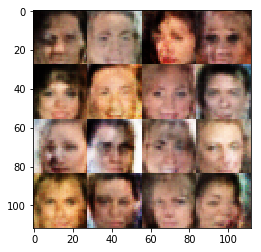

Epoch 0/1... Discriminator Loss: 0.8937... Generator Loss: 1.1601
Epoch 0/1... Discriminator Loss: 0.3731... Generator Loss: 1.5114
Epoch 0/1... Discriminator Loss: 0.3638... Generator Loss: 1.8296
Epoch 0/1... Discriminator Loss: 0.7528... Generator Loss: 0.7631
Epoch 0/1... Discriminator Loss: 0.6444... Generator Loss: 0.9339


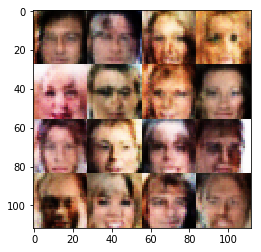

Epoch 0/1... Discriminator Loss: 0.8082... Generator Loss: 4.6607
Epoch 0/1... Discriminator Loss: 0.6310... Generator Loss: 2.2217
Epoch 0/1... Discriminator Loss: 1.4962... Generator Loss: 0.3645
Epoch 0/1... Discriminator Loss: 1.9046... Generator Loss: 0.2305
Epoch 0/1... Discriminator Loss: 0.8293... Generator Loss: 1.4499


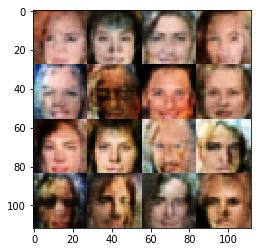

Epoch 0/1... Discriminator Loss: 1.4741... Generator Loss: 0.3711
Epoch 0/1... Discriminator Loss: 0.3638... Generator Loss: 2.5379
Epoch 0/1... Discriminator Loss: 0.8101... Generator Loss: 0.9358
Epoch 0/1... Discriminator Loss: 0.6677... Generator Loss: 0.9958
Epoch 0/1... Discriminator Loss: 0.9644... Generator Loss: 0.5797


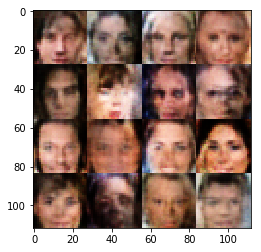

Epoch 0/1... Discriminator Loss: 0.9497... Generator Loss: 0.5843
Epoch 0/1... Discriminator Loss: 0.8677... Generator Loss: 0.6689
Epoch 0/1... Discriminator Loss: 0.1086... Generator Loss: 3.5312
Epoch 0/1... Discriminator Loss: 0.4722... Generator Loss: 1.9786
Epoch 0/1... Discriminator Loss: 1.1525... Generator Loss: 0.5005


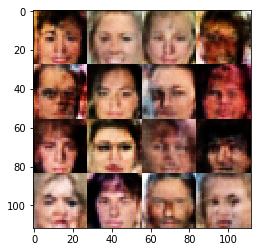

Epoch 0/1... Discriminator Loss: 0.5119... Generator Loss: 1.6927
Epoch 0/1... Discriminator Loss: 0.3810... Generator Loss: 2.3594
Epoch 0/1... Discriminator Loss: 0.7297... Generator Loss: 1.1798
Epoch 0/1... Discriminator Loss: 0.9159... Generator Loss: 0.8145
Epoch 0/1... Discriminator Loss: 0.2841... Generator Loss: 2.2766


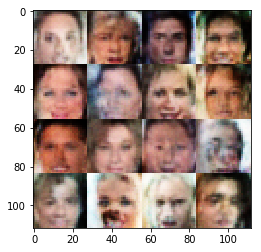

Epoch 0/1... Discriminator Loss: 0.6970... Generator Loss: 1.0459
Epoch 0/1... Discriminator Loss: 0.4300... Generator Loss: 1.5511
Epoch 0/1... Discriminator Loss: 0.2445... Generator Loss: 2.9079
Epoch 0/1... Discriminator Loss: 0.5814... Generator Loss: 2.2121
Epoch 0/1... Discriminator Loss: 0.5976... Generator Loss: 1.4015


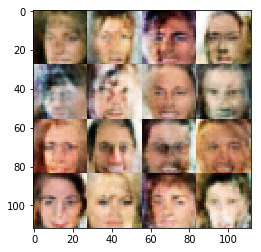

Epoch 0/1... Discriminator Loss: 0.6760... Generator Loss: 1.1331
Epoch 0/1... Discriminator Loss: 0.2675... Generator Loss: 1.9565
Epoch 0/1... Discriminator Loss: 0.7062... Generator Loss: 0.8299
Epoch 0/1... Discriminator Loss: 1.4468... Generator Loss: 0.3694
Epoch 0/1... Discriminator Loss: 0.6189... Generator Loss: 2.0657


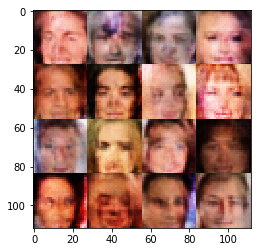

Epoch 0/1... Discriminator Loss: 0.9528... Generator Loss: 2.9281
Epoch 0/1... Discriminator Loss: 1.3747... Generator Loss: 0.3957
Epoch 0/1... Discriminator Loss: 0.6946... Generator Loss: 1.2417
Epoch 0/1... Discriminator Loss: 0.1159... Generator Loss: 3.2837
Epoch 0/1... Discriminator Loss: 1.1971... Generator Loss: 1.8639


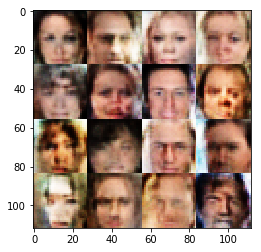

Epoch 0/1... Discriminator Loss: 2.0730... Generator Loss: 0.1800
Epoch 0/1... Discriminator Loss: 1.7941... Generator Loss: 0.2594
Epoch 0/1... Discriminator Loss: 1.0095... Generator Loss: 0.6287
Epoch 0/1... Discriminator Loss: 0.6859... Generator Loss: 0.9607
Epoch 0/1... Discriminator Loss: 1.4110... Generator Loss: 0.3871


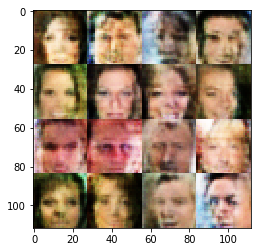

Epoch 0/1... Discriminator Loss: 0.9534... Generator Loss: 1.0181
Epoch 0/1... Discriminator Loss: 0.6813... Generator Loss: 1.2918
Epoch 0/1... Discriminator Loss: 0.4613... Generator Loss: 1.5022
Epoch 0/1... Discriminator Loss: 0.7674... Generator Loss: 0.8856
Epoch 0/1... Discriminator Loss: 1.4096... Generator Loss: 0.3535


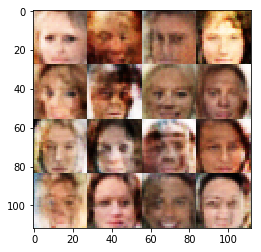

Epoch 0/1... Discriminator Loss: 0.6260... Generator Loss: 1.9430
Epoch 0/1... Discriminator Loss: 1.8671... Generator Loss: 0.3027
Epoch 0/1... Discriminator Loss: 0.9843... Generator Loss: 0.8626
Epoch 0/1... Discriminator Loss: 0.5998... Generator Loss: 1.7428
Epoch 0/1... Discriminator Loss: 0.5745... Generator Loss: 1.0712


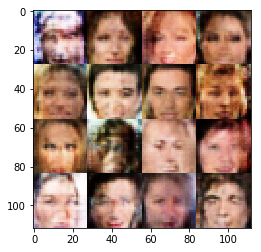

Epoch 0/1... Discriminator Loss: 1.0263... Generator Loss: 2.4495
Epoch 0/1... Discriminator Loss: 0.7573... Generator Loss: 0.9530
Epoch 0/1... Discriminator Loss: 1.5517... Generator Loss: 0.2859
Epoch 0/1... Discriminator Loss: 0.5802... Generator Loss: 4.1779
Epoch 0/1... Discriminator Loss: 0.4715... Generator Loss: 3.4917


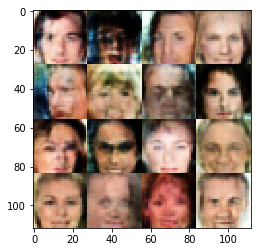

Epoch 0/1... Discriminator Loss: 0.5692... Generator Loss: 1.2733
Epoch 0/1... Discriminator Loss: 1.3427... Generator Loss: 0.3997
Epoch 0/1... Discriminator Loss: 0.8923... Generator Loss: 0.7337
Epoch 0/1... Discriminator Loss: 0.7142... Generator Loss: 2.4112
Epoch 0/1... Discriminator Loss: 1.0447... Generator Loss: 1.7397


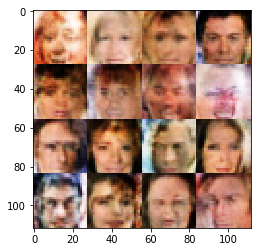

Epoch 0/1... Discriminator Loss: 0.6211... Generator Loss: 1.3709
Epoch 0/1... Discriminator Loss: 0.8186... Generator Loss: 2.8712
Epoch 0/1... Discriminator Loss: 0.3372... Generator Loss: 1.8032
Epoch 0/1... Discriminator Loss: 0.6559... Generator Loss: 1.0495
Epoch 0/1... Discriminator Loss: 0.4315... Generator Loss: 2.5889


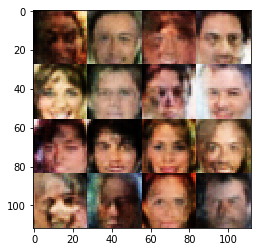

Epoch 0/1... Discriminator Loss: 0.9740... Generator Loss: 0.8901
Epoch 0/1... Discriminator Loss: 1.5605... Generator Loss: 0.3079
Epoch 0/1... Discriminator Loss: 1.0968... Generator Loss: 0.6622
Epoch 0/1... Discriminator Loss: 1.4747... Generator Loss: 0.3238
Epoch 0/1... Discriminator Loss: 0.2750... Generator Loss: 2.2383


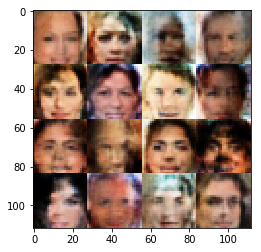

Epoch 0/1... Discriminator Loss: 0.7090... Generator Loss: 1.3975
Epoch 0/1... Discriminator Loss: 0.8317... Generator Loss: 0.8610
Epoch 0/1... Discriminator Loss: 0.1760... Generator Loss: 2.5338
Epoch 0/1... Discriminator Loss: 1.8798... Generator Loss: 0.2251
Epoch 0/1... Discriminator Loss: 1.3549... Generator Loss: 1.5419


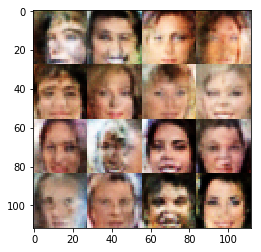

Epoch 0/1... Discriminator Loss: 0.6279... Generator Loss: 1.7641
Epoch 0/1... Discriminator Loss: 0.6651... Generator Loss: 1.2749
Epoch 0/1... Discriminator Loss: 0.4928... Generator Loss: 1.7100
Epoch 0/1... Discriminator Loss: 0.5412... Generator Loss: 1.5704
Epoch 0/1... Discriminator Loss: 0.2316... Generator Loss: 2.7478


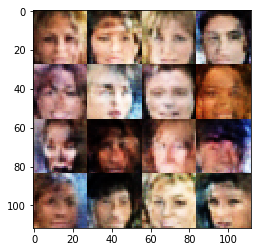

Epoch 0/1... Discriminator Loss: 1.2927... Generator Loss: 0.4740
Epoch 0/1... Discriminator Loss: 0.2011... Generator Loss: 2.3242
Epoch 0/1... Discriminator Loss: 0.5486... Generator Loss: 1.7222
Epoch 0/1... Discriminator Loss: 1.5550... Generator Loss: 0.3257
Epoch 0/1... Discriminator Loss: 0.6857... Generator Loss: 1.7926


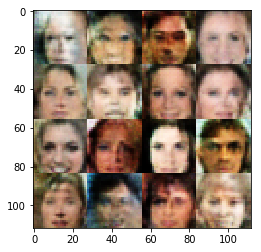

Epoch 0/1... Discriminator Loss: 0.3406... Generator Loss: 1.9996
Epoch 0/1... Discriminator Loss: 0.2188... Generator Loss: 2.3696
Epoch 0/1... Discriminator Loss: 1.2162... Generator Loss: 0.5405
Epoch 0/1... Discriminator Loss: 0.8567... Generator Loss: 0.8469
Epoch 0/1... Discriminator Loss: 0.5788... Generator Loss: 1.4662


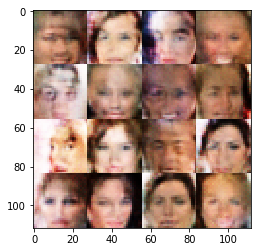

Epoch 0/1... Discriminator Loss: 0.7361... Generator Loss: 1.2502
Epoch 0/1... Discriminator Loss: 0.6382... Generator Loss: 1.2597
Epoch 0/1... Discriminator Loss: 0.4207... Generator Loss: 1.8058
Epoch 0/1... Discriminator Loss: 0.9021... Generator Loss: 0.9230
Epoch 0/1... Discriminator Loss: 0.5459... Generator Loss: 1.5091


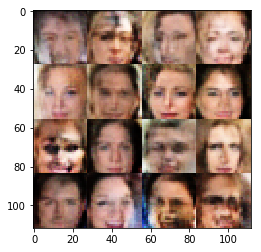

Epoch 0/1... Discriminator Loss: 0.6213... Generator Loss: 1.1627
Epoch 0/1... Discriminator Loss: 0.1762... Generator Loss: 4.0008
Epoch 0/1... Discriminator Loss: 1.0875... Generator Loss: 1.2749
Epoch 0/1... Discriminator Loss: 0.2171... Generator Loss: 2.2000
Epoch 0/1... Discriminator Loss: 2.5288... Generator Loss: 0.1273


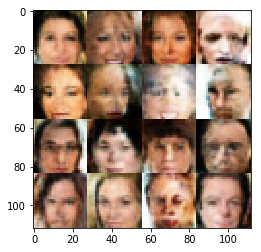

Epoch 0/1... Discriminator Loss: 1.3813... Generator Loss: 0.3835
Epoch 0/1... Discriminator Loss: 0.5883... Generator Loss: 1.0837
Epoch 0/1... Discriminator Loss: 1.8508... Generator Loss: 0.2353
Epoch 0/1... Discriminator Loss: 0.2791... Generator Loss: 2.0752
Epoch 0/1... Discriminator Loss: 0.1701... Generator Loss: 3.6397


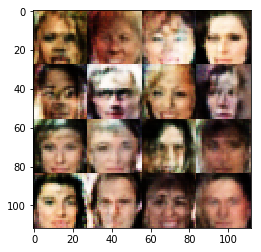

Epoch 0/1... Discriminator Loss: 1.5836... Generator Loss: 0.2787
Epoch 0/1... Discriminator Loss: 0.6723... Generator Loss: 0.9379
Epoch 0/1... Discriminator Loss: 2.0110... Generator Loss: 0.2443
Epoch 0/1... Discriminator Loss: 0.2549... Generator Loss: 2.7901
Epoch 0/1... Discriminator Loss: 0.3009... Generator Loss: 2.2540


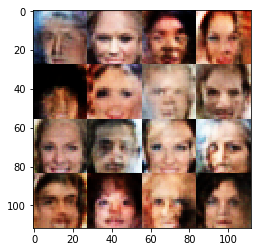

Epoch 0/1... Discriminator Loss: 0.3210... Generator Loss: 1.9319
Epoch 0/1... Discriminator Loss: 0.2187... Generator Loss: 2.5845
Epoch 0/1... Discriminator Loss: 1.0628... Generator Loss: 0.5944
Epoch 0/1... Discriminator Loss: 0.0847... Generator Loss: 3.3962
Epoch 0/1... Discriminator Loss: 1.4771... Generator Loss: 0.3488


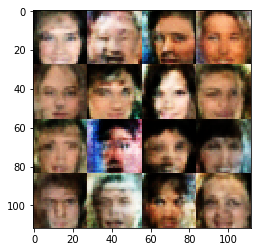

Epoch 0/1... Discriminator Loss: 0.6526... Generator Loss: 1.1848
Epoch 0/1... Discriminator Loss: 0.1943... Generator Loss: 2.8970
Epoch 0/1... Discriminator Loss: 0.4981... Generator Loss: 2.1686
Epoch 0/1... Discriminator Loss: 0.7920... Generator Loss: 0.7803
Epoch 0/1... Discriminator Loss: 0.4950... Generator Loss: 1.2487


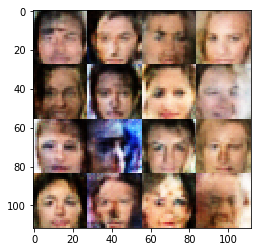

Epoch 0/1... Discriminator Loss: 0.4203... Generator Loss: 1.7306
Epoch 0/1... Discriminator Loss: 1.9948... Generator Loss: 0.2099
Epoch 0/1... Discriminator Loss: 0.2926... Generator Loss: 3.6836
Epoch 0/1... Discriminator Loss: 0.8201... Generator Loss: 1.6612
Epoch 0/1... Discriminator Loss: 0.1454... Generator Loss: 3.3711


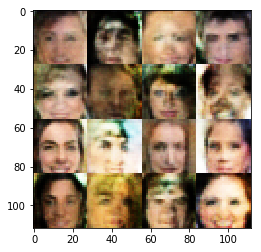

Epoch 0/1... Discriminator Loss: 0.3764... Generator Loss: 1.6193
Epoch 0/1... Discriminator Loss: 0.1323... Generator Loss: 2.6018
Epoch 0/1... Discriminator Loss: 0.0935... Generator Loss: 3.5183
Epoch 0/1... Discriminator Loss: 0.0415... Generator Loss: 4.8218
Epoch 0/1... Discriminator Loss: 1.5760... Generator Loss: 4.2824


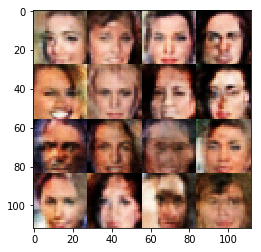

Epoch 0/1... Discriminator Loss: 0.6514... Generator Loss: 1.0903
Epoch 0/1... Discriminator Loss: 0.3537... Generator Loss: 1.4430
Epoch 0/1... Discriminator Loss: 0.9990... Generator Loss: 0.7120
Epoch 0/1... Discriminator Loss: 0.3470... Generator Loss: 3.0274
Epoch 0/1... Discriminator Loss: 0.1071... Generator Loss: 4.9009


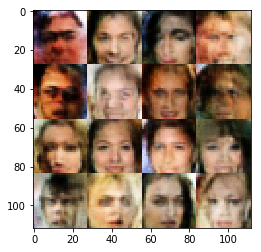

Epoch 0/1... Discriminator Loss: 0.2167... Generator Loss: 2.5658
Epoch 0/1... Discriminator Loss: 0.2086... Generator Loss: 2.3709
Epoch 0/1... Discriminator Loss: 1.3601... Generator Loss: 0.3887
Epoch 0/1... Discriminator Loss: 0.9444... Generator Loss: 0.6153
Epoch 0/1... Discriminator Loss: 0.3137... Generator Loss: 3.1585


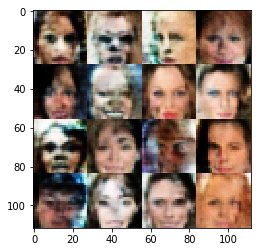

Epoch 0/1... Discriminator Loss: 1.4919... Generator Loss: 0.3680
Epoch 0/1... Discriminator Loss: 0.0418... Generator Loss: 6.9317
Epoch 0/1... Discriminator Loss: 0.1979... Generator Loss: 2.5071
Epoch 0/1... Discriminator Loss: 0.2750... Generator Loss: 1.7807
Epoch 0/1... Discriminator Loss: 0.6473... Generator Loss: 1.7516


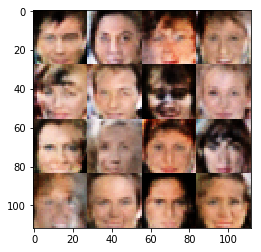

Epoch 0/1... Discriminator Loss: 0.2184... Generator Loss: 2.4626
Epoch 0/1... Discriminator Loss: 0.1844... Generator Loss: 2.3108
Epoch 0/1... Discriminator Loss: 0.4515... Generator Loss: 2.0300
Epoch 0/1... Discriminator Loss: 0.0805... Generator Loss: 4.5367
Epoch 0/1... Discriminator Loss: 2.1892... Generator Loss: 0.1688


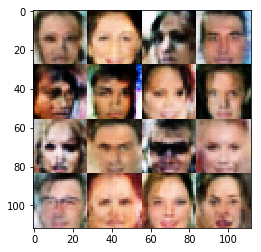

Epoch 0/1... Discriminator Loss: 0.8002... Generator Loss: 0.8535
Epoch 0/1... Discriminator Loss: 0.1394... Generator Loss: 3.3633
Epoch 0/1... Discriminator Loss: 0.2577... Generator Loss: 3.2626
Epoch 0/1... Discriminator Loss: 0.1502... Generator Loss: 2.7116
Epoch 0/1... Discriminator Loss: 1.4290... Generator Loss: 0.3850


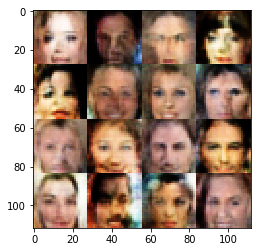

Epoch 0/1... Discriminator Loss: 0.1606... Generator Loss: 3.1578
Epoch 0/1... Discriminator Loss: 0.0665... Generator Loss: 5.3581
Epoch 0/1... Discriminator Loss: 0.1028... Generator Loss: 3.2980
Epoch 0/1... Discriminator Loss: 0.1609... Generator Loss: 2.4497
Epoch 0/1... Discriminator Loss: 0.0982... Generator Loss: 3.4541


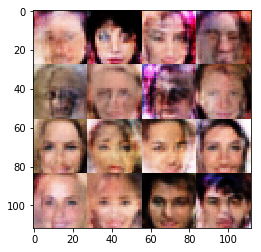

Epoch 0/1... Discriminator Loss: 0.0765... Generator Loss: 3.9726
Epoch 0/1... Discriminator Loss: 0.0364... Generator Loss: 4.9344
Epoch 0/1... Discriminator Loss: 0.0393... Generator Loss: 5.4017
Epoch 0/1... Discriminator Loss: 0.0561... Generator Loss: 5.3664
Epoch 0/1... Discriminator Loss: 0.0693... Generator Loss: 3.5327


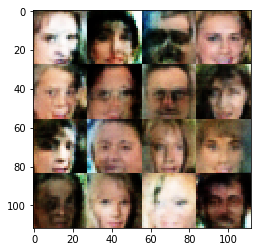

Epoch 0/1... Discriminator Loss: 0.4149... Generator Loss: 1.2989
Epoch 0/1... Discriminator Loss: 0.1055... Generator Loss: 2.9391
Epoch 0/1... Discriminator Loss: 0.0689... Generator Loss: 4.9834
Epoch 0/1... Discriminator Loss: 0.0438... Generator Loss: 4.2163
Epoch 0/1... Discriminator Loss: 0.2112... Generator Loss: 2.1117


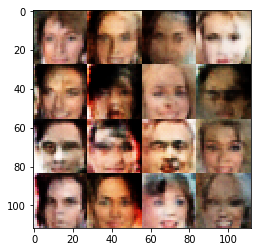

Epoch 0/1... Discriminator Loss: 0.1795... Generator Loss: 2.5630
Epoch 0/1... Discriminator Loss: 0.2662... Generator Loss: 2.0608
Epoch 0/1... Discriminator Loss: 0.1894... Generator Loss: 3.9219
Epoch 0/1... Discriminator Loss: 0.1386... Generator Loss: 4.7305
Epoch 0/1... Discriminator Loss: 0.1709... Generator Loss: 2.7980


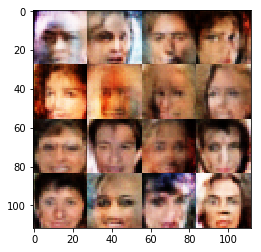

Epoch 0/1... Discriminator Loss: 0.5107... Generator Loss: 1.2228
Epoch 0/1... Discriminator Loss: 0.0930... Generator Loss: 6.0969
Epoch 0/1... Discriminator Loss: 0.1156... Generator Loss: 5.2561
Epoch 0/1... Discriminator Loss: 0.3302... Generator Loss: 1.5180
Epoch 0/1... Discriminator Loss: 0.0665... Generator Loss: 6.8404


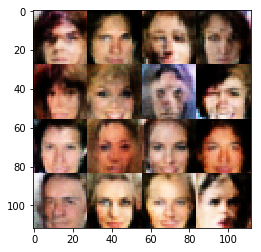

Epoch 0/1... Discriminator Loss: 0.4935... Generator Loss: 1.3062
Epoch 0/1... Discriminator Loss: 0.2409... Generator Loss: 2.0310
Epoch 0/1... Discriminator Loss: 0.1319... Generator Loss: 4.1608
Epoch 0/1... Discriminator Loss: 0.4450... Generator Loss: 1.2676
Epoch 0/1... Discriminator Loss: 0.0919... Generator Loss: 5.7712


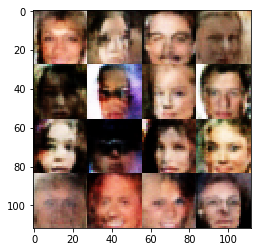

Epoch 0/1... Discriminator Loss: 0.0567... Generator Loss: 3.6890
Epoch 0/1... Discriminator Loss: 0.1157... Generator Loss: 6.5946
Epoch 0/1... Discriminator Loss: 0.0303... Generator Loss: 6.8860
Epoch 0/1... Discriminator Loss: 0.2905... Generator Loss: 8.4073
Epoch 0/1... Discriminator Loss: 0.5146... Generator Loss: 1.1376


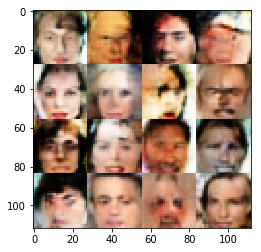

Epoch 0/1... Discriminator Loss: 2.0808... Generator Loss: 8.8347
Epoch 0/1... Discriminator Loss: 0.3619... Generator Loss: 2.5832
Epoch 0/1... Discriminator Loss: 0.1090... Generator Loss: 4.1011
Epoch 0/1... Discriminator Loss: 2.1054... Generator Loss: 0.2238
Epoch 0/1... Discriminator Loss: 0.1846... Generator Loss: 2.5732


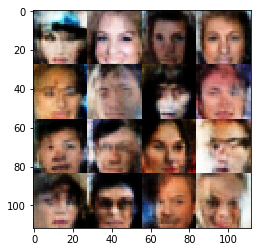

Epoch 0/1... Discriminator Loss: 0.2580... Generator Loss: 2.1126
Epoch 0/1... Discriminator Loss: 0.9791... Generator Loss: 0.6518
Epoch 0/1... Discriminator Loss: 0.1115... Generator Loss: 5.3364
Epoch 0/1... Discriminator Loss: 1.9959... Generator Loss: 0.2382
Epoch 0/1... Discriminator Loss: 0.1034... Generator Loss: 3.2982


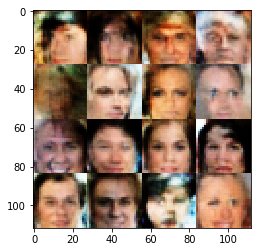

Epoch 0/1... Discriminator Loss: 0.0356... Generator Loss: 5.7910
Epoch 0/1... Discriminator Loss: 0.1099... Generator Loss: 8.8230
Epoch 0/1... Discriminator Loss: 1.7295... Generator Loss: 0.3452
Epoch 0/1... Discriminator Loss: 0.4652... Generator Loss: 1.2644
Epoch 0/1... Discriminator Loss: 0.2058... Generator Loss: 3.3525


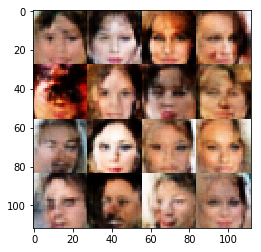

Epoch 0/1... Discriminator Loss: 0.1129... Generator Loss: 3.2755
Epoch 0/1... Discriminator Loss: 0.1388... Generator Loss: 5.5454
Epoch 0/1... Discriminator Loss: 0.0957... Generator Loss: 3.1890
Epoch 0/1... Discriminator Loss: 0.1800... Generator Loss: 2.1136
Epoch 0/1... Discriminator Loss: 0.2847... Generator Loss: 1.6668


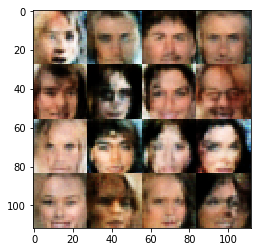

Epoch 0/1... Discriminator Loss: 0.3173... Generator Loss: 3.9195
Epoch 0/1... Discriminator Loss: 0.2746... Generator Loss: 1.9249
Epoch 0/1... Discriminator Loss: 0.0592... Generator Loss: 4.2522
Epoch 0/1... Discriminator Loss: 0.1267... Generator Loss: 3.0405
Epoch 0/1... Discriminator Loss: 0.6904... Generator Loss: 0.9702


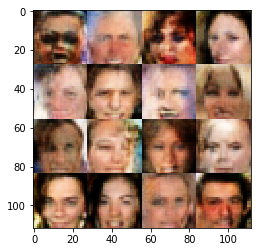

Epoch 0/1... Discriminator Loss: 0.7859... Generator Loss: 0.8374
Epoch 0/1... Discriminator Loss: 0.2649... Generator Loss: 3.6341
Epoch 0/1... Discriminator Loss: 0.0597... Generator Loss: 3.6531
Epoch 0/1... Discriminator Loss: 0.1722... Generator Loss: 4.5387
Epoch 0/1... Discriminator Loss: 0.0890... Generator Loss: 5.0588


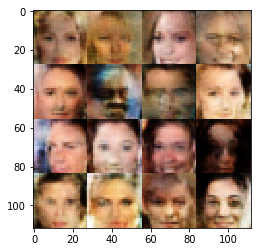

Epoch 0/1... Discriminator Loss: 0.1822... Generator Loss: 2.9685
Epoch 0/1... Discriminator Loss: 0.0814... Generator Loss: 3.9063
Epoch 0/1... Discriminator Loss: 0.1615... Generator Loss: 6.0841
Epoch 0/1... Discriminator Loss: 0.1642... Generator Loss: 2.6621
Epoch 0/1... Discriminator Loss: 0.0391... Generator Loss: 6.0235


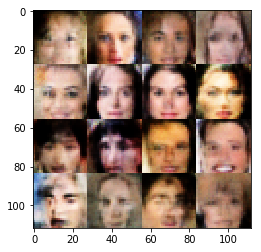

Epoch 0/1... Discriminator Loss: 0.0855... Generator Loss: 3.1921
Epoch 0/1... Discriminator Loss: 0.5367... Generator Loss: 1.1475
Epoch 0/1... Discriminator Loss: 0.0357... Generator Loss: 7.8419
Epoch 0/1... Discriminator Loss: 1.0092... Generator Loss: 0.5701
Epoch 0/1... Discriminator Loss: 0.0697... Generator Loss: 7.7371


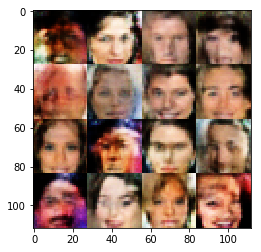

Epoch 0/1... Discriminator Loss: 0.0267... Generator Loss: 10.1652
Epoch 0/1... Discriminator Loss: 0.0538... Generator Loss: 6.4005
Epoch 0/1... Discriminator Loss: 0.0542... Generator Loss: 6.6013
Epoch 0/1... Discriminator Loss: 0.0163... Generator Loss: 5.9272
Epoch 0/1... Discriminator Loss: 0.0881... Generator Loss: 5.6883


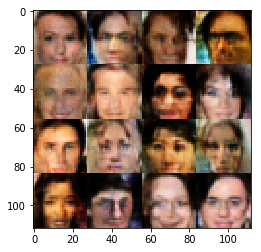

Epoch 0/1... Discriminator Loss: 0.0572... Generator Loss: 4.1588
Epoch 0/1... Discriminator Loss: 0.2728... Generator Loss: 1.9408
Epoch 0/1... Discriminator Loss: 0.6340... Generator Loss: 1.0842
Epoch 0/1... Discriminator Loss: 0.1045... Generator Loss: 4.2465
Epoch 0/1... Discriminator Loss: 0.0651... Generator Loss: 5.7703


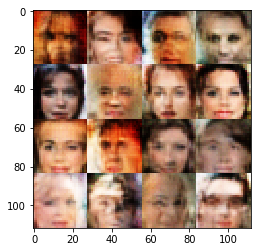

Epoch 0/1... Discriminator Loss: 0.1021... Generator Loss: 7.8717
Epoch 0/1... Discriminator Loss: 0.0186... Generator Loss: 7.4197
Epoch 0/1... Discriminator Loss: 0.0762... Generator Loss: 3.7021
Epoch 0/1... Discriminator Loss: 0.0729... Generator Loss: 3.4399
Epoch 0/1... Discriminator Loss: 0.0540... Generator Loss: 5.3995


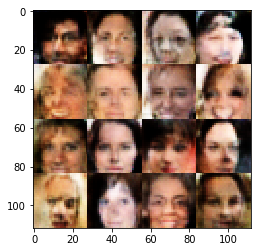

Epoch 0/1... Discriminator Loss: 0.0258... Generator Loss: 5.8007
Epoch 0/1... Discriminator Loss: 0.0383... Generator Loss: 4.2683
Epoch 0/1... Discriminator Loss: 0.1015... Generator Loss: 7.1464
Epoch 0/1... Discriminator Loss: 0.1349... Generator Loss: 7.5090
Epoch 0/1... Discriminator Loss: 1.8998... Generator Loss: 0.2500


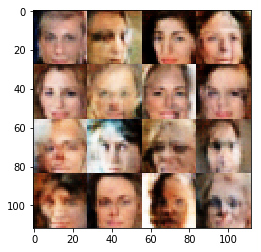

Epoch 0/1... Discriminator Loss: 0.1287... Generator Loss: 2.8034
Epoch 0/1... Discriminator Loss: 1.9532... Generator Loss: 0.2347
Epoch 0/1... Discriminator Loss: 0.2594... Generator Loss: 2.3421
Epoch 0/1... Discriminator Loss: 0.3853... Generator Loss: 1.4268
Epoch 0/1... Discriminator Loss: 0.3598... Generator Loss: 9.9841


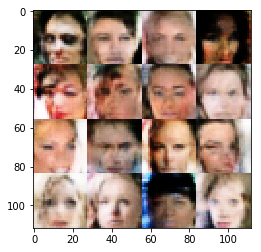

Epoch 0/1... Discriminator Loss: 0.2067... Generator Loss: 2.1870
Epoch 0/1... Discriminator Loss: 0.1173... Generator Loss: 2.7415
Epoch 0/1... Discriminator Loss: 0.7589... Generator Loss: 6.3636
Epoch 0/1... Discriminator Loss: 0.7889... Generator Loss: 0.7348
Epoch 0/1... Discriminator Loss: 0.3534... Generator Loss: 7.9558


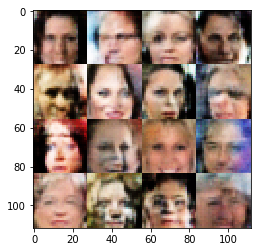

Epoch 0/1... Discriminator Loss: 0.0508... Generator Loss: 5.9914
Epoch 0/1... Discriminator Loss: 0.1154... Generator Loss: 2.8510
Epoch 0/1... Discriminator Loss: 0.1010... Generator Loss: 2.9834
Epoch 0/1... Discriminator Loss: 0.3947... Generator Loss: 1.5630
Epoch 0/1... Discriminator Loss: 0.1314... Generator Loss: 6.8578


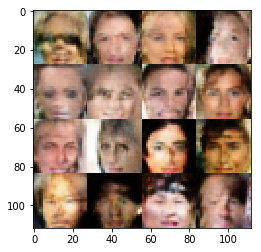

Epoch 0/1... Discriminator Loss: 0.0878... Generator Loss: 3.8335
Epoch 0/1... Discriminator Loss: 0.0611... Generator Loss: 8.1232
Epoch 0/1... Discriminator Loss: 0.3258... Generator Loss: 1.6612
Epoch 0/1... Discriminator Loss: 0.7605... Generator Loss: 1.0826
Epoch 0/1... Discriminator Loss: 0.5654... Generator Loss: 1.2208


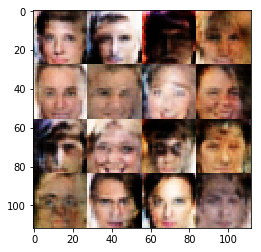

Epoch 0/1... Discriminator Loss: 0.1282... Generator Loss: 4.0633
Epoch 0/1... Discriminator Loss: 0.3728... Generator Loss: 1.5312
Epoch 0/1... Discriminator Loss: 0.0182... Generator Loss: 5.7237
Epoch 0/1... Discriminator Loss: 0.1337... Generator Loss: 2.6506
Epoch 0/1... Discriminator Loss: 0.0401... Generator Loss: 6.0172


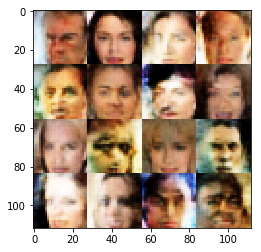

Epoch 0/1... Discriminator Loss: 0.8690... Generator Loss: 0.8049
Epoch 0/1... Discriminator Loss: 0.0470... Generator Loss: 8.8155
Epoch 0/1... Discriminator Loss: 0.0202... Generator Loss: 5.4208
Epoch 0/1... Discriminator Loss: 0.4141... Generator Loss: 1.7902
Epoch 0/1... Discriminator Loss: 0.1093... Generator Loss: 5.0018


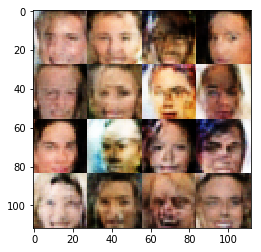

Epoch 0/1... Discriminator Loss: 0.3007... Generator Loss: 1.7273
Epoch 0/1... Discriminator Loss: 0.1918... Generator Loss: 5.4203
Epoch 0/1... Discriminator Loss: 0.1638... Generator Loss: 3.5346
Epoch 0/1... Discriminator Loss: 0.1273... Generator Loss: 2.5964
Epoch 0/1... Discriminator Loss: 0.2927... Generator Loss: 1.7705


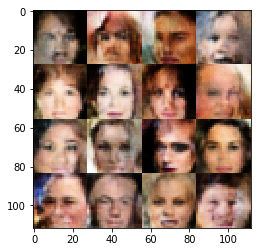

Epoch 0/1... Discriminator Loss: 0.0978... Generator Loss: 2.9487
Epoch 0/1... Discriminator Loss: 0.2707... Generator Loss: 4.9113
Epoch 0/1... Discriminator Loss: 2.9721... Generator Loss: 0.0743
Epoch 0/1... Discriminator Loss: 0.6590... Generator Loss: 0.9899
Epoch 0/1... Discriminator Loss: 0.7789... Generator Loss: 0.8818


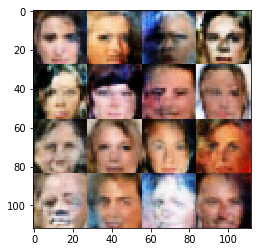

Epoch 0/1... Discriminator Loss: 0.0613... Generator Loss: 7.3127
Epoch 0/1... Discriminator Loss: 0.1615... Generator Loss: 2.6127
Epoch 0/1... Discriminator Loss: 0.0467... Generator Loss: 4.6425
Epoch 0/1... Discriminator Loss: 0.0619... Generator Loss: 4.3042
Epoch 0/1... Discriminator Loss: 0.0668... Generator Loss: 5.0756


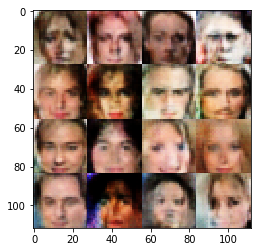

Epoch 0/1... Discriminator Loss: 0.1741... Generator Loss: 3.0536
Epoch 0/1... Discriminator Loss: 0.0077... Generator Loss: 10.1478
Epoch 0/1... Discriminator Loss: 0.0636... Generator Loss: 4.1288
Epoch 0/1... Discriminator Loss: 0.1738... Generator Loss: 2.3787
Epoch 0/1... Discriminator Loss: 1.1819... Generator Loss: 0.4502


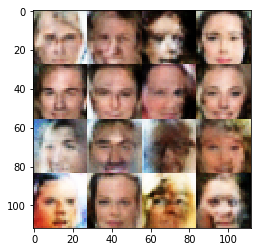

Epoch 0/1... Discriminator Loss: 0.0323... Generator Loss: 5.0088
Epoch 0/1... Discriminator Loss: 0.0262... Generator Loss: 7.3084
Epoch 0/1... Discriminator Loss: 0.1592... Generator Loss: 9.4999
Epoch 0/1... Discriminator Loss: 0.5209... Generator Loss: 1.1677
Epoch 0/1... Discriminator Loss: 0.4121... Generator Loss: 1.4306


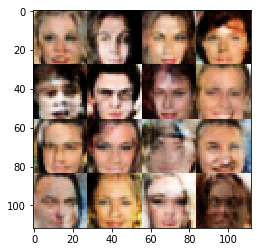

Epoch 0/1... Discriminator Loss: 0.2707... Generator Loss: 1.7789
Epoch 0/1... Discriminator Loss: 0.1748... Generator Loss: 2.2500
Epoch 0/1... Discriminator Loss: 0.0624... Generator Loss: 3.7521
Epoch 0/1... Discriminator Loss: 0.0508... Generator Loss: 6.0455
Epoch 0/1... Discriminator Loss: 0.1338... Generator Loss: 4.8907


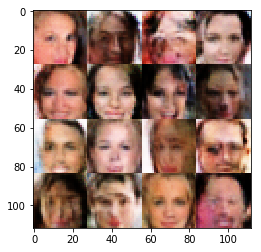

Epoch 0/1... Discriminator Loss: 0.0163... Generator Loss: 9.8202
Epoch 0/1... Discriminator Loss: 0.0625... Generator Loss: 3.5253
Epoch 0/1... Discriminator Loss: 0.0270... Generator Loss: 6.2774
Epoch 0/1... Discriminator Loss: 1.2412... Generator Loss: 0.5161
Epoch 0/1... Discriminator Loss: 0.0397... Generator Loss: 4.9492


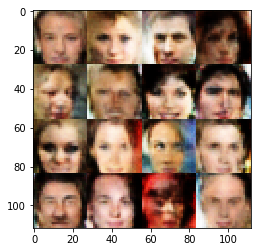

Epoch 0/1... Discriminator Loss: 1.6105... Generator Loss: 0.4937
Epoch 0/1... Discriminator Loss: 0.0561... Generator Loss: 5.8783
Epoch 0/1... Discriminator Loss: 0.1031... Generator Loss: 4.7055
Epoch 0/1... Discriminator Loss: 0.0684... Generator Loss: 4.3885
Epoch 0/1... Discriminator Loss: 1.5656... Generator Loss: 0.3867


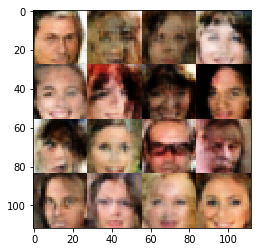

Epoch 0/1... Discriminator Loss: 0.0802... Generator Loss: 5.5164
Epoch 0/1... Discriminator Loss: 0.0745... Generator Loss: 3.5610
Epoch 0/1... Discriminator Loss: 0.2437... Generator Loss: 1.8097
Epoch 0/1... Discriminator Loss: 0.1070... Generator Loss: 3.2147
Epoch 0/1... Discriminator Loss: 0.0187... Generator Loss: 4.8578


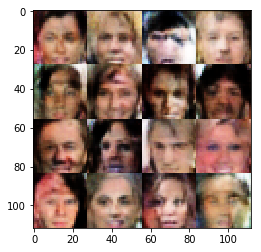

Epoch 0/1... Discriminator Loss: 0.2198... Generator Loss: 2.1623
Epoch 0/1... Discriminator Loss: 0.0348... Generator Loss: 5.5126
Epoch 0/1... Discriminator Loss: 0.1967... Generator Loss: 2.1831
Epoch 0/1... Discriminator Loss: 0.0382... Generator Loss: 7.4214
Epoch 0/1... Discriminator Loss: 0.7613... Generator Loss: 0.7755


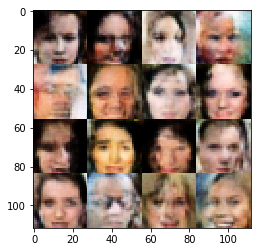

Epoch 0/1... Discriminator Loss: 0.1705... Generator Loss: 2.2387
Epoch 0/1... Discriminator Loss: 0.2431... Generator Loss: 5.2163
Epoch 0/1... Discriminator Loss: 0.7109... Generator Loss: 0.9633
Epoch 0/1... Discriminator Loss: 0.1547... Generator Loss: 2.5408
Epoch 0/1... Discriminator Loss: 0.0266... Generator Loss: 5.0467


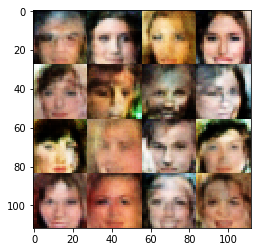

Epoch 0/1... Discriminator Loss: 0.0880... Generator Loss: 3.1231
Epoch 0/1... Discriminator Loss: 0.1209... Generator Loss: 10.4201
Epoch 0/1... Discriminator Loss: 0.1212... Generator Loss: 3.3042
Epoch 0/1... Discriminator Loss: 0.1153... Generator Loss: 10.0225
Epoch 0/1... Discriminator Loss: 0.3405... Generator Loss: 4.3405


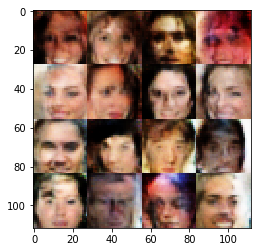

Epoch 0/1... Discriminator Loss: 0.6313... Generator Loss: 1.2336
Epoch 0/1... Discriminator Loss: 0.1020... Generator Loss: 3.5850
Epoch 0/1... Discriminator Loss: 0.2426... Generator Loss: 2.4648
Epoch 0/1... Discriminator Loss: 0.1657... Generator Loss: 2.4633
Epoch 0/1... Discriminator Loss: 0.4114... Generator Loss: 1.4947


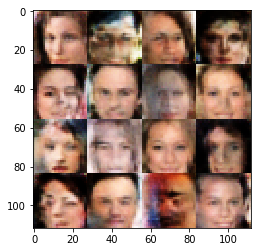

Epoch 0/1... Discriminator Loss: 0.1206... Generator Loss: 6.3458
Epoch 0/1... Discriminator Loss: 0.0567... Generator Loss: 4.3462
Epoch 0/1... Discriminator Loss: 0.3072... Generator Loss: 1.7621
Epoch 0/1... Discriminator Loss: 0.0577... Generator Loss: 3.7406
Epoch 0/1... Discriminator Loss: 0.4276... Generator Loss: 3.7650


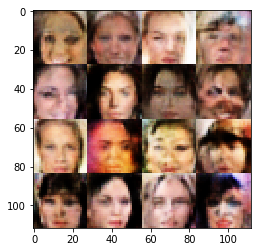

Epoch 0/1... Discriminator Loss: 0.2297... Generator Loss: 2.0194
Epoch 0/1... Discriminator Loss: 0.0720... Generator Loss: 6.2604
Epoch 0/1... Discriminator Loss: 0.0588... Generator Loss: 5.0200
Epoch 0/1... Discriminator Loss: 0.0690... Generator Loss: 3.5512
Epoch 0/1... Discriminator Loss: 0.1187... Generator Loss: 2.9015


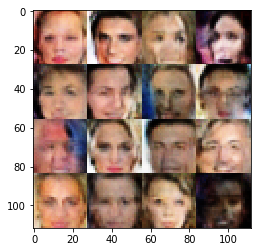

Epoch 0/1... Discriminator Loss: 1.5041... Generator Loss: 0.3179
Epoch 0/1... Discriminator Loss: 0.2989... Generator Loss: 1.7073
Epoch 0/1... Discriminator Loss: 0.0634... Generator Loss: 8.3957
Epoch 0/1... Discriminator Loss: 0.0115... Generator Loss: 6.5939
Epoch 0/1... Discriminator Loss: 0.2588... Generator Loss: 5.8275


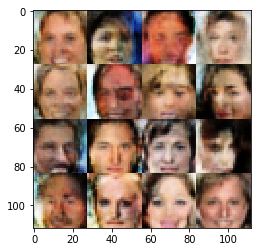

Epoch 0/1... Discriminator Loss: 0.0576... Generator Loss: 8.0163
Epoch 0/1... Discriminator Loss: 0.0348... Generator Loss: 5.5981
Epoch 0/1... Discriminator Loss: 0.0215... Generator Loss: 6.0356
Epoch 0/1... Discriminator Loss: 0.0905... Generator Loss: 3.7584
Epoch 0/1... Discriminator Loss: 0.0542... Generator Loss: 7.1562


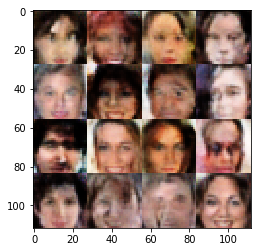

Epoch 0/1... Discriminator Loss: 0.0513... Generator Loss: 6.4750
Epoch 0/1... Discriminator Loss: 0.3663... Generator Loss: 1.4617
Epoch 0/1... Discriminator Loss: 0.0176... Generator Loss: 5.0682
Epoch 0/1... Discriminator Loss: 0.2415... Generator Loss: 2.0263
Epoch 0/1... Discriminator Loss: 0.0438... Generator Loss: 4.7030


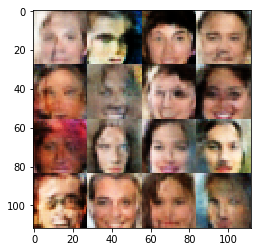

Epoch 0/1... Discriminator Loss: 0.0182... Generator Loss: 6.6207
Epoch 0/1... Discriminator Loss: 0.1228... Generator Loss: 2.9209
Epoch 0/1... Discriminator Loss: 0.0633... Generator Loss: 5.1194
Epoch 0/1... Discriminator Loss: 0.1902... Generator Loss: 2.2100
Epoch 0/1... Discriminator Loss: 1.5407... Generator Loss: 2.3610


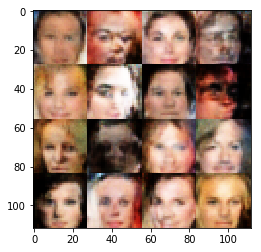

Epoch 0/1... Discriminator Loss: 1.4690... Generator Loss: 0.4786
Epoch 0/1... Discriminator Loss: 1.3888... Generator Loss: 0.4316
Epoch 0/1... Discriminator Loss: 0.8900... Generator Loss: 0.7786
Epoch 0/1... Discriminator Loss: 0.0244... Generator Loss: 6.2040
Epoch 0/1... Discriminator Loss: 0.0955... Generator Loss: 3.7078


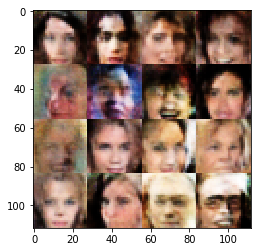

Epoch 0/1... Discriminator Loss: 0.3511... Generator Loss: 1.6807
Epoch 0/1... Discriminator Loss: 0.0497... Generator Loss: 4.7111
Epoch 0/1... Discriminator Loss: 0.1290... Generator Loss: 4.5079
Epoch 0/1... Discriminator Loss: 0.3616... Generator Loss: 1.8377
Epoch 0/1... Discriminator Loss: 0.4226... Generator Loss: 1.5274


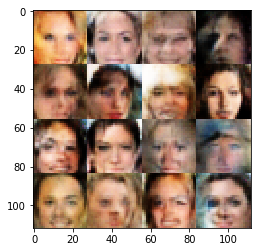

Epoch 0/1... Discriminator Loss: 0.0342... Generator Loss: 5.7629
Epoch 0/1... Discriminator Loss: 0.0702... Generator Loss: 4.1835
Epoch 0/1... Discriminator Loss: 0.1849... Generator Loss: 2.4174
Epoch 0/1... Discriminator Loss: 0.1908... Generator Loss: 2.2104
Epoch 0/1... Discriminator Loss: 0.0987... Generator Loss: 3.5043


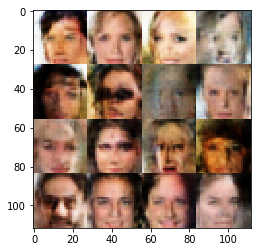

Epoch 0/1... Discriminator Loss: 0.1191... Generator Loss: 5.5945
Epoch 0/1... Discriminator Loss: 0.0429... Generator Loss: 4.7617
Epoch 0/1... Discriminator Loss: 0.3169... Generator Loss: 4.4545
Epoch 0/1... Discriminator Loss: 0.0394... Generator Loss: 5.7293
Epoch 0/1... Discriminator Loss: 0.0512... Generator Loss: 10.5299


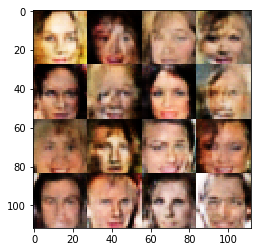

Epoch 0/1... Discriminator Loss: 0.1085... Generator Loss: 3.2913
Epoch 0/1... Discriminator Loss: 1.5378... Generator Loss: 0.3377
Epoch 0/1... Discriminator Loss: 0.0401... Generator Loss: 4.7058
Epoch 0/1... Discriminator Loss: 0.0260... Generator Loss: 10.3480
Epoch 0/1... Discriminator Loss: 0.0289... Generator Loss: 4.7917


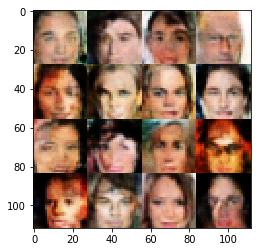

Epoch 0/1... Discriminator Loss: 0.0346... Generator Loss: 4.4658
Epoch 0/1... Discriminator Loss: 0.1386... Generator Loss: 3.8830
Epoch 0/1... Discriminator Loss: 2.5352... Generator Loss: 0.1566
Epoch 0/1... Discriminator Loss: 1.0327... Generator Loss: 6.6825
Epoch 0/1... Discriminator Loss: 0.1406... Generator Loss: 2.6404


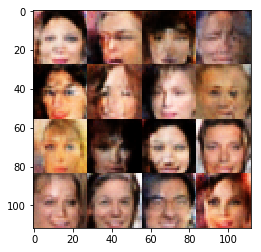

Epoch 0/1... Discriminator Loss: 0.7784... Generator Loss: 1.0239
Epoch 0/1... Discriminator Loss: 0.3729... Generator Loss: 1.6243
Epoch 0/1... Discriminator Loss: 0.0701... Generator Loss: 3.5177
Epoch 0/1... Discriminator Loss: 0.2488... Generator Loss: 2.0159
Epoch 0/1... Discriminator Loss: 0.3677... Generator Loss: 11.8356


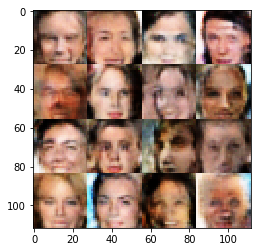

Epoch 0/1... Discriminator Loss: 0.3580... Generator Loss: 7.0895
Epoch 0/1... Discriminator Loss: 0.0879... Generator Loss: 3.4803
Epoch 0/1... Discriminator Loss: 0.3752... Generator Loss: 1.6261
Epoch 0/1... Discriminator Loss: 0.6178... Generator Loss: 1.0271
Epoch 0/1... Discriminator Loss: 0.0499... Generator Loss: 4.1722


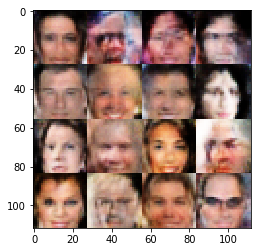

Epoch 0/1... Discriminator Loss: 0.5018... Generator Loss: 1.3090
Epoch 0/1... Discriminator Loss: 0.0438... Generator Loss: 8.7085
Epoch 0/1... Discriminator Loss: 0.0501... Generator Loss: 7.3165
Epoch 0/1... Discriminator Loss: 0.3468... Generator Loss: 1.8721
Epoch 0/1... Discriminator Loss: 0.1551... Generator Loss: 2.5025


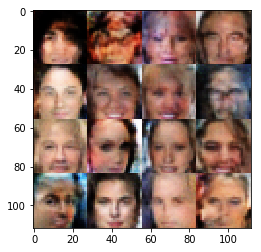

Epoch 0/1... Discriminator Loss: 0.3149... Generator Loss: 6.0838
Epoch 0/1... Discriminator Loss: 0.0754... Generator Loss: 4.1074
Epoch 0/1... Discriminator Loss: 0.0272... Generator Loss: 6.1095
Epoch 0/1... Discriminator Loss: 0.0407... Generator Loss: 4.7454
Epoch 0/1... Discriminator Loss: 0.0936... Generator Loss: 3.1458


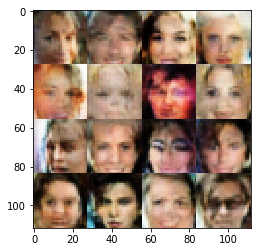

Epoch 0/1... Discriminator Loss: 0.7647... Generator Loss: 0.9971
Epoch 0/1... Discriminator Loss: 0.0141... Generator Loss: 5.6572
Epoch 0/1... Discriminator Loss: 0.6397... Generator Loss: 1.2078
Epoch 0/1... Discriminator Loss: 0.0466... Generator Loss: 6.3995
Epoch 0/1... Discriminator Loss: 0.6210... Generator Loss: 1.2293


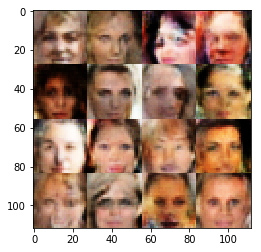

Epoch 0/1... Discriminator Loss: 0.1210... Generator Loss: 2.9776
Epoch 0/1... Discriminator Loss: 0.0570... Generator Loss: 3.9312
Epoch 0/1... Discriminator Loss: 0.1884... Generator Loss: 2.5698
Epoch 0/1... Discriminator Loss: 0.1920... Generator Loss: 2.5476
Epoch 0/1... Discriminator Loss: 0.1244... Generator Loss: 3.0999


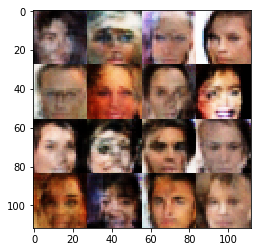

Epoch 0/1... Discriminator Loss: 0.8346... Generator Loss: 0.9002
Epoch 0/1... Discriminator Loss: 0.1690... Generator Loss: 2.5708
Epoch 0/1... Discriminator Loss: 0.0377... Generator Loss: 5.5641
Epoch 0/1... Discriminator Loss: 0.0341... Generator Loss: 4.9829
Epoch 0/1... Discriminator Loss: 0.0591... Generator Loss: 5.2232


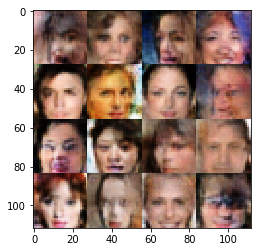

Epoch 0/1... Discriminator Loss: 0.0246... Generator Loss: 5.6143
Epoch 0/1... Discriminator Loss: 0.0287... Generator Loss: 9.6157
Epoch 0/1... Discriminator Loss: 2.6699... Generator Loss: 7.5129
Epoch 0/1... Discriminator Loss: 3.4940... Generator Loss: 6.9790
Epoch 0/1... Discriminator Loss: 0.0671... Generator Loss: 6.8969


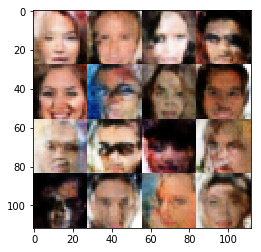

Epoch 0/1... Discriminator Loss: 0.0580... Generator Loss: 3.8658
Epoch 0/1... Discriminator Loss: 0.1415... Generator Loss: 2.5170
Epoch 0/1... Discriminator Loss: 0.3878... Generator Loss: 1.4905
Epoch 0/1... Discriminator Loss: 0.0365... Generator Loss: 4.2368
Epoch 0/1... Discriminator Loss: 0.0329... Generator Loss: 6.6433


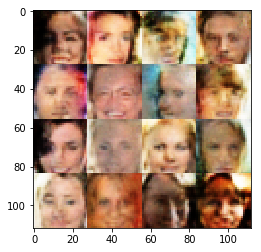

Epoch 0/1... Discriminator Loss: 0.7275... Generator Loss: 1.1423
Epoch 0/1... Discriminator Loss: 0.0206... Generator Loss: 7.7622
Epoch 0/1... Discriminator Loss: 0.2384... Generator Loss: 3.8961
Epoch 0/1... Discriminator Loss: 0.0528... Generator Loss: 9.8338
Epoch 0/1... Discriminator Loss: 0.0278... Generator Loss: 8.2940


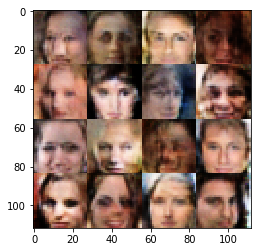

Epoch 0/1... Discriminator Loss: 0.0856... Generator Loss: 5.2514
Epoch 0/1... Discriminator Loss: 0.0349... Generator Loss: 5.8041
Epoch 0/1... Discriminator Loss: 0.0317... Generator Loss: 10.0938
Epoch 0/1... Discriminator Loss: 0.1425... Generator Loss: 2.7973
Epoch 0/1... Discriminator Loss: 0.0539... Generator Loss: 6.3628


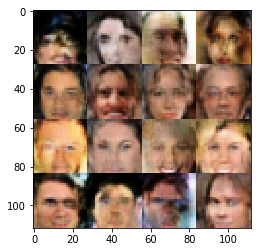

Epoch 0/1... Discriminator Loss: 0.2135... Generator Loss: 2.2685
Epoch 0/1... Discriminator Loss: 0.0819... Generator Loss: 3.3680
Epoch 0/1... Discriminator Loss: 0.8198... Generator Loss: 0.8525
Epoch 0/1... Discriminator Loss: 2.4277... Generator Loss: 3.0650
Epoch 0/1... Discriminator Loss: 0.1260... Generator Loss: 3.0238


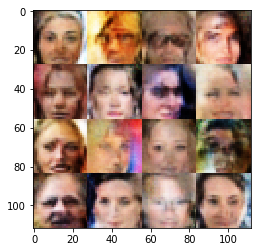

Epoch 0/1... Discriminator Loss: 0.8762... Generator Loss: 0.6865
Epoch 0/1... Discriminator Loss: 0.3096... Generator Loss: 1.8638
Epoch 0/1... Discriminator Loss: 0.1356... Generator Loss: 2.8183
Epoch 0/1... Discriminator Loss: 0.8641... Generator Loss: 0.8005
Epoch 0/1... Discriminator Loss: 0.2572... Generator Loss: 6.7159


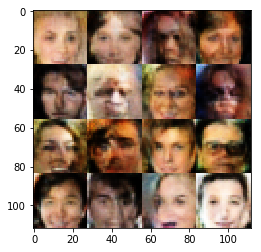

Epoch 0/1... Discriminator Loss: 0.1554... Generator Loss: 8.5557
Epoch 0/1... Discriminator Loss: 0.0112... Generator Loss: 10.2125
Epoch 0/1... Discriminator Loss: 0.1760... Generator Loss: 2.5412
Epoch 0/1... Discriminator Loss: 0.0265... Generator Loss: 4.7902


In [62]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.